Running test case 0 with input 'No input'...
[1] [3] [[1, 0], [0, 0], [0, 1], [1, 1]]
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
circuit =  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j] target =  1 (1+0j)
001 (1+0j)
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
1
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
[3] [1] [[1, 0], [1, 1], [0, 1], [0, 0]]
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
circuit =  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.

/Users/venkat/opt/anaconda3/envs/QCML/lib/python3.9/site-packages/pennylane/drawer/mpldrawer.py:276: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self._fig = plt.figure(figsize=figsize)


1
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
[2] [0] [[1, 1], [1, 0], [0, 0], [0, 1]]
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
circuit =  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j] target =  1 (1+2.4492935982947064e-16j)
001 (1+2.4492935982947064e-16j)
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
1
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True), tensor(-0.70711-0.j, requires_grad=True)}
[0] [1] [[0, 0], [1, 1], [1, 0], [0, 1]]
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True)}
{tensor(0.+0.j, requires_grad=True), tensor(0.70711+0.j, requires_grad=True)}
circuit =  [1.+0.

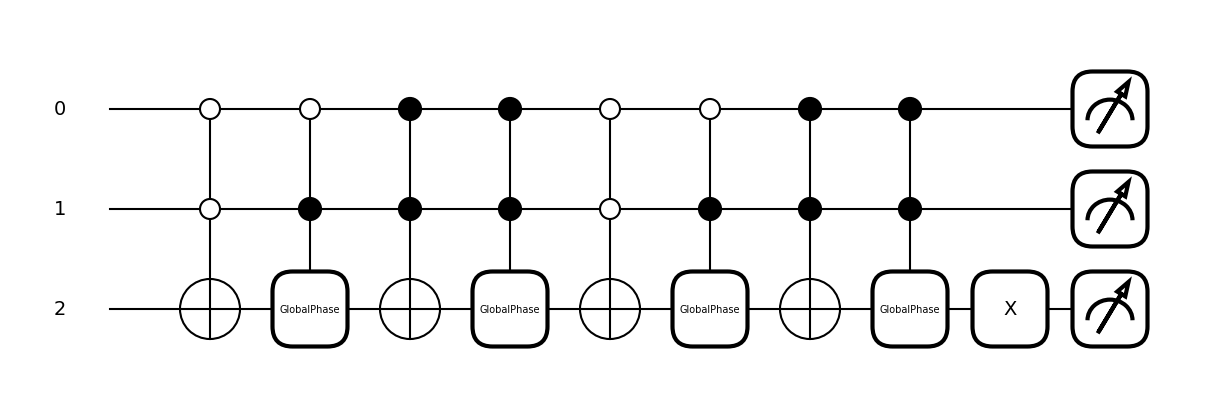

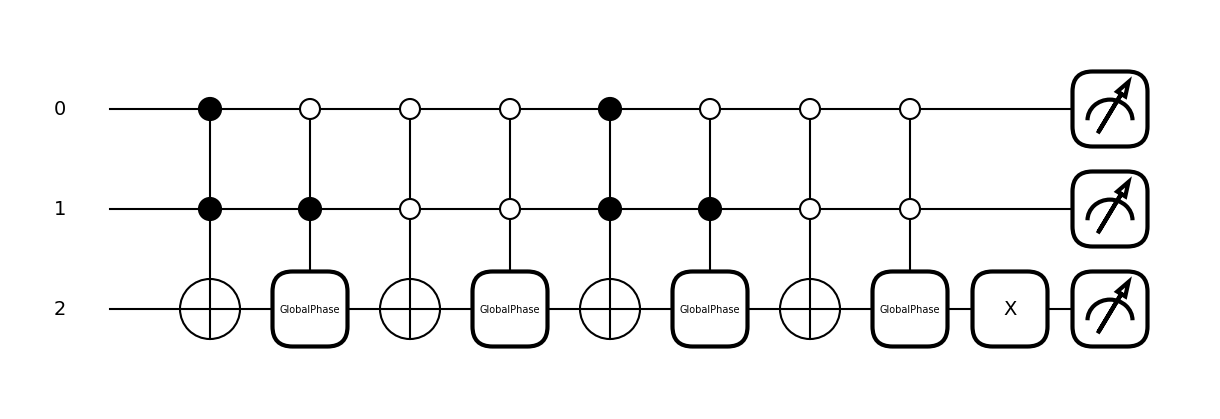

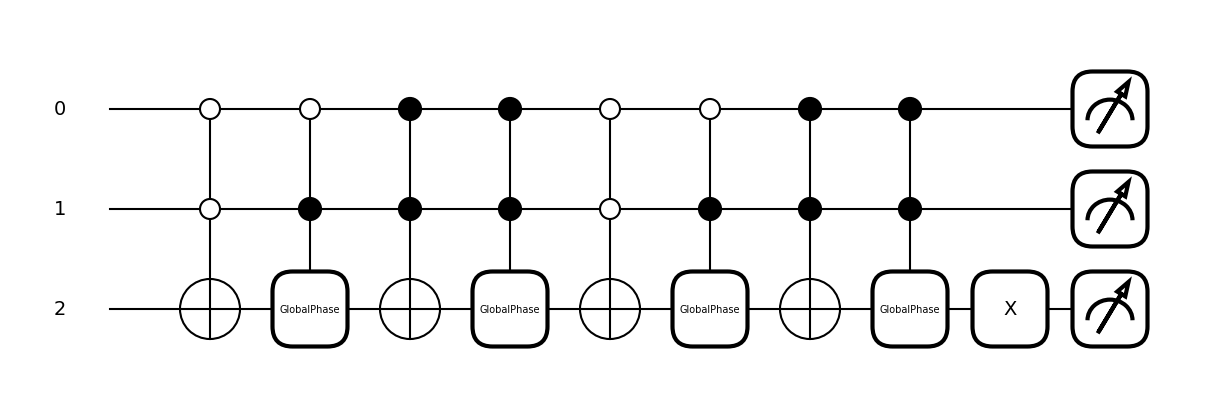

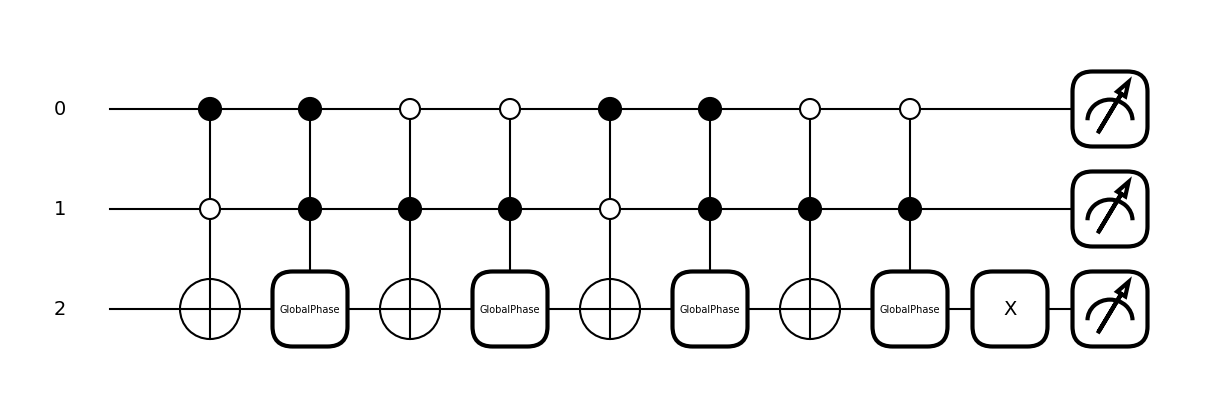

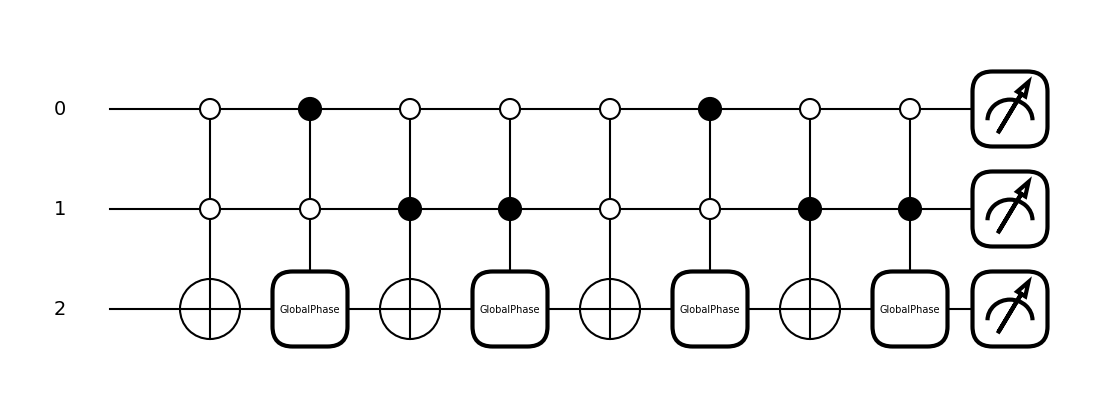

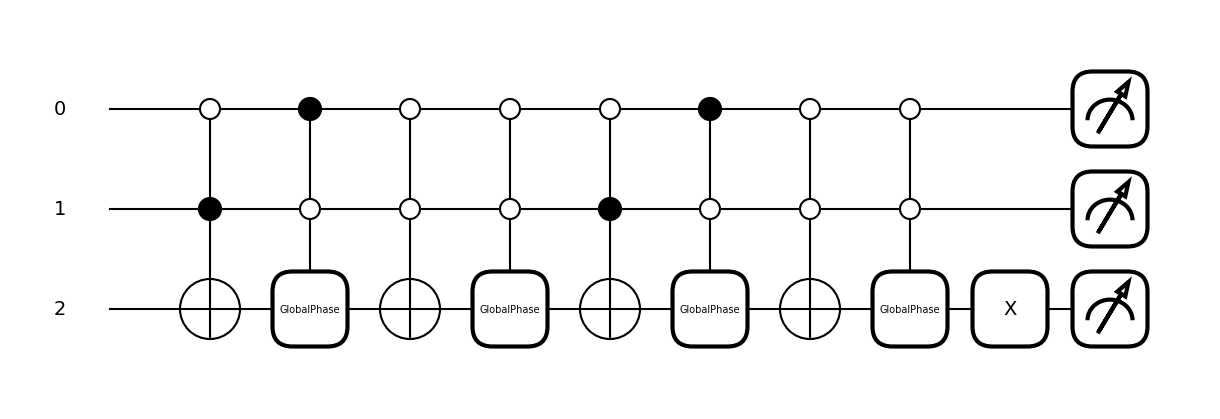

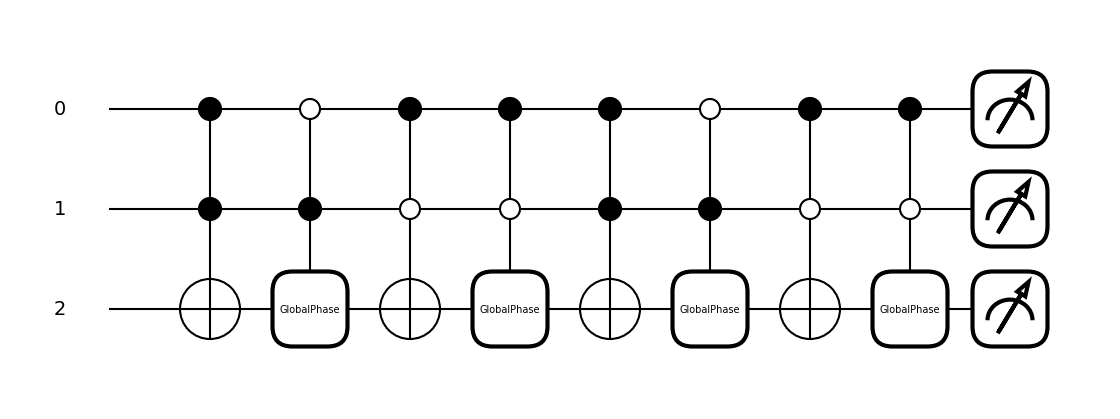

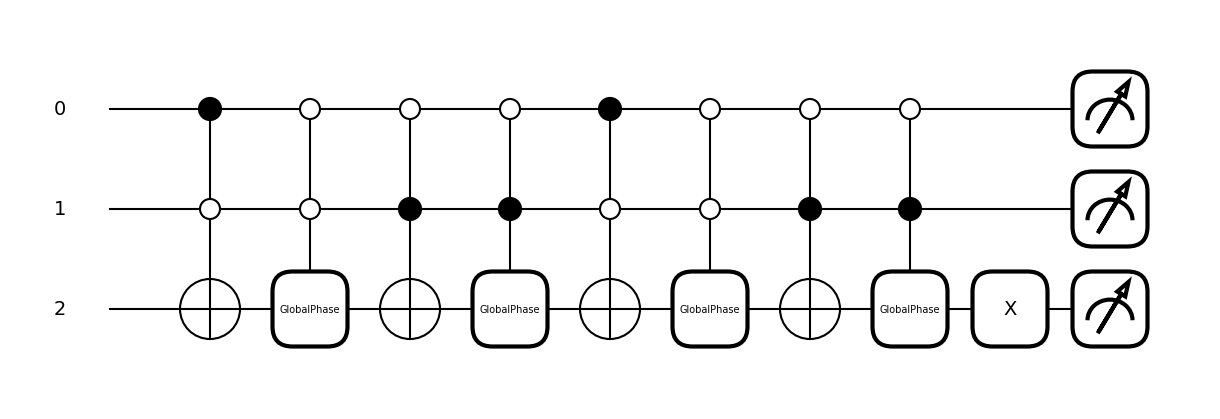

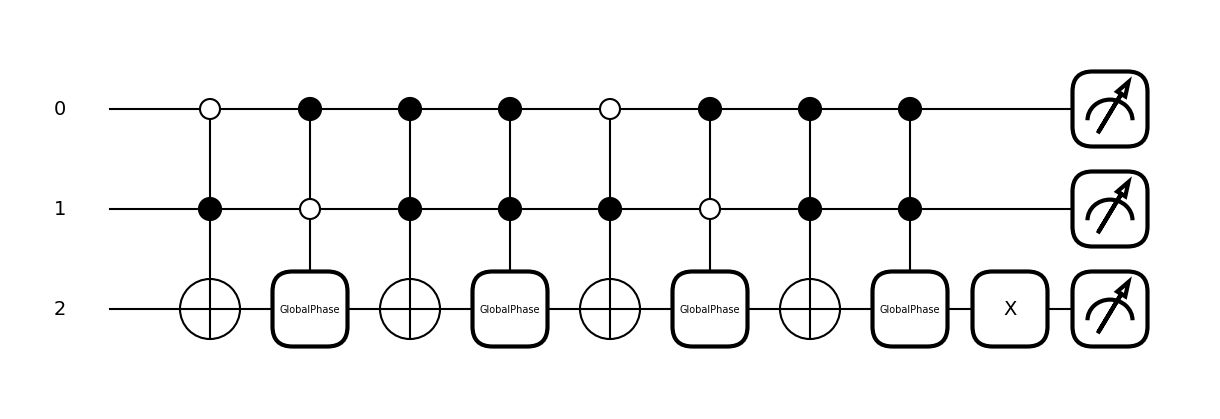

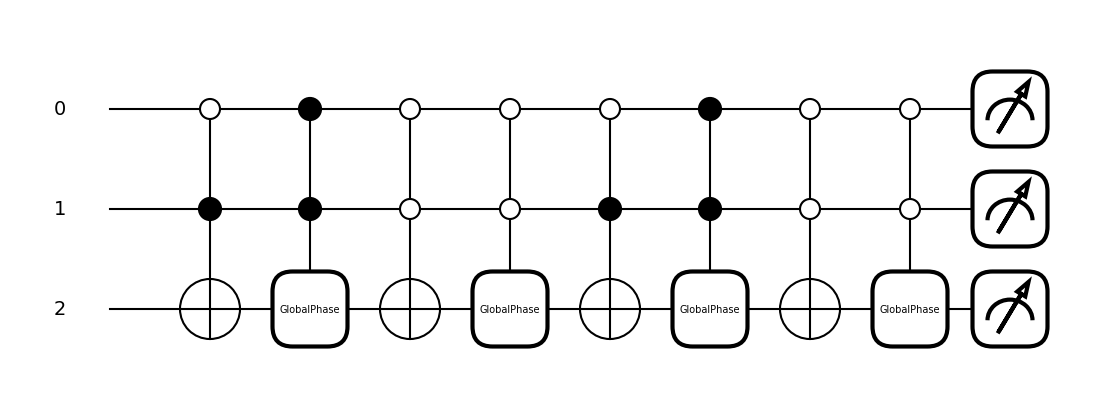

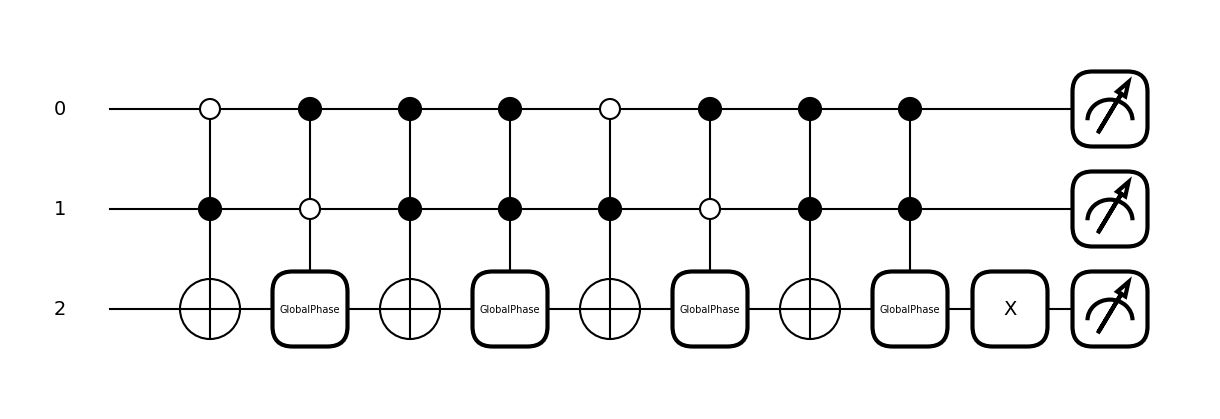

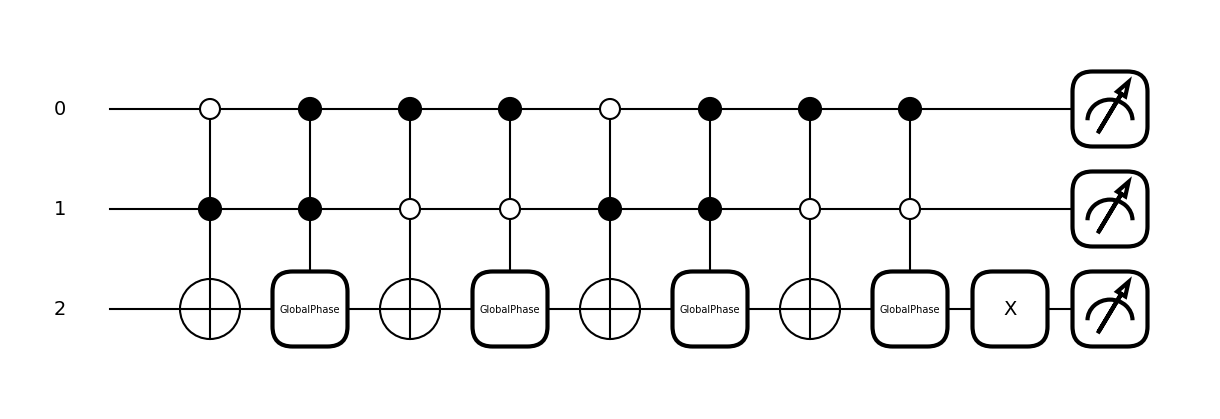

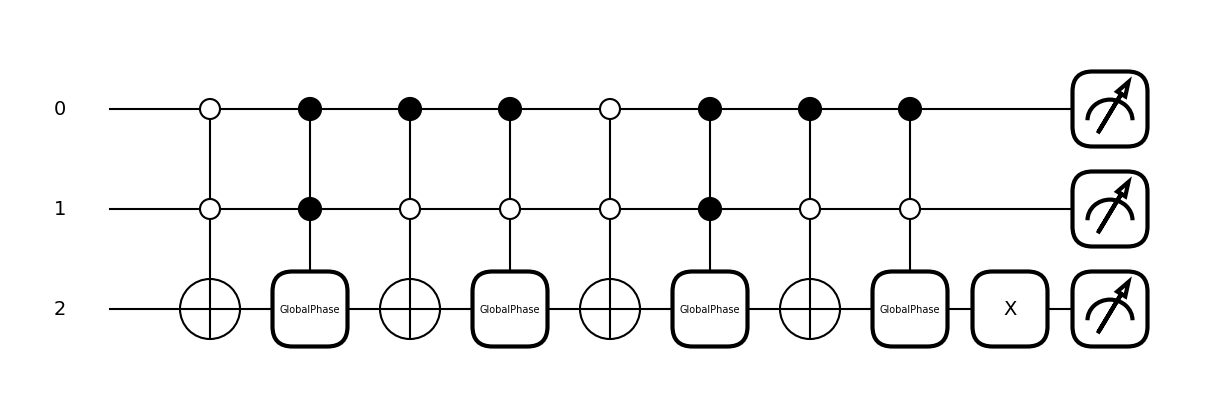

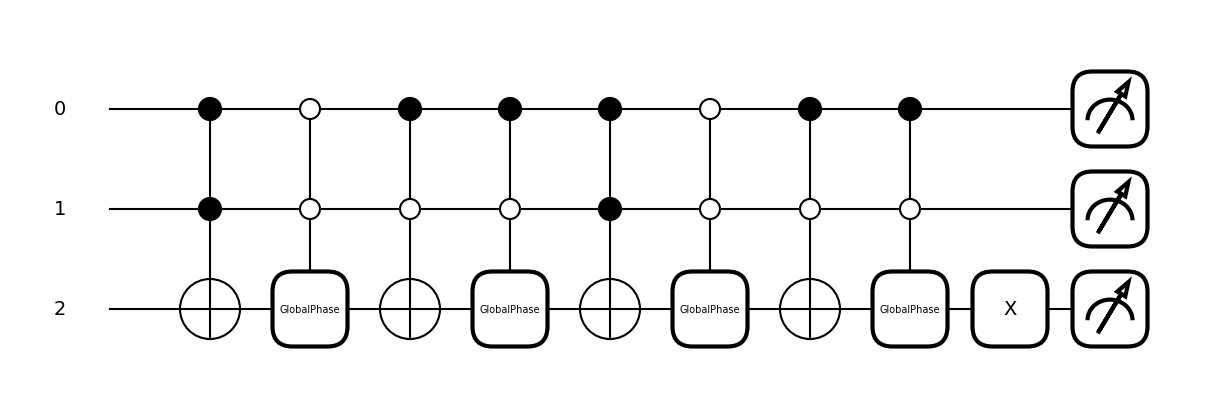

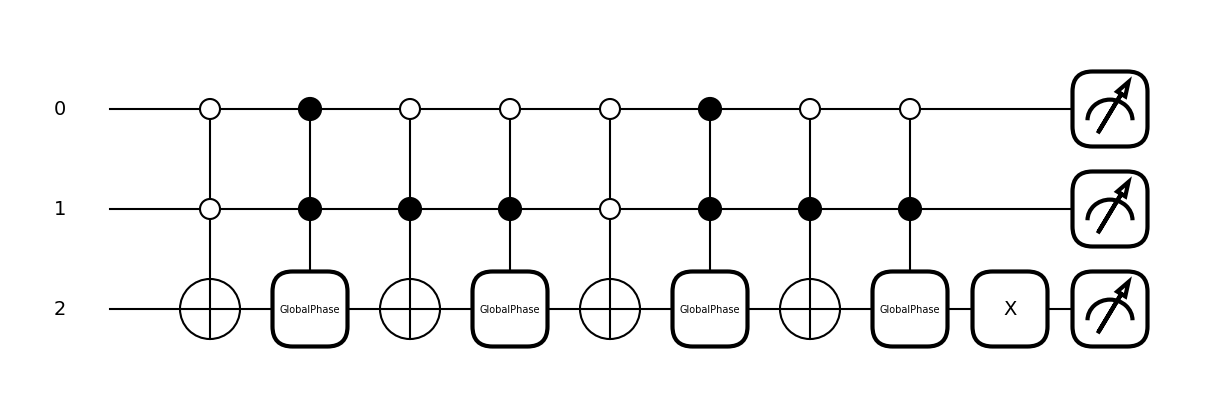

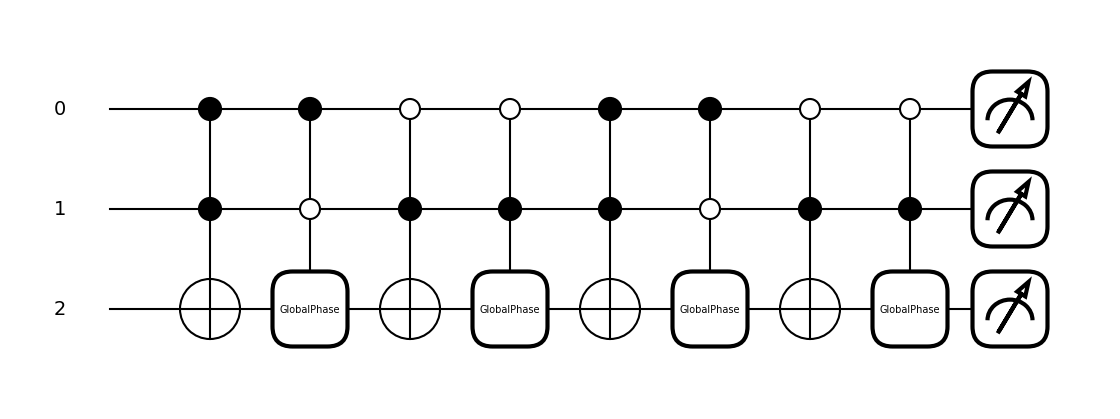

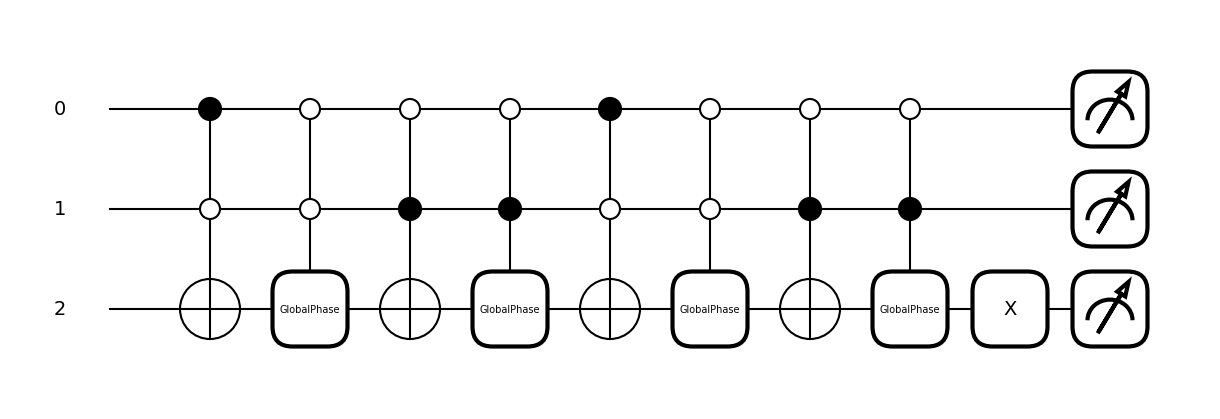

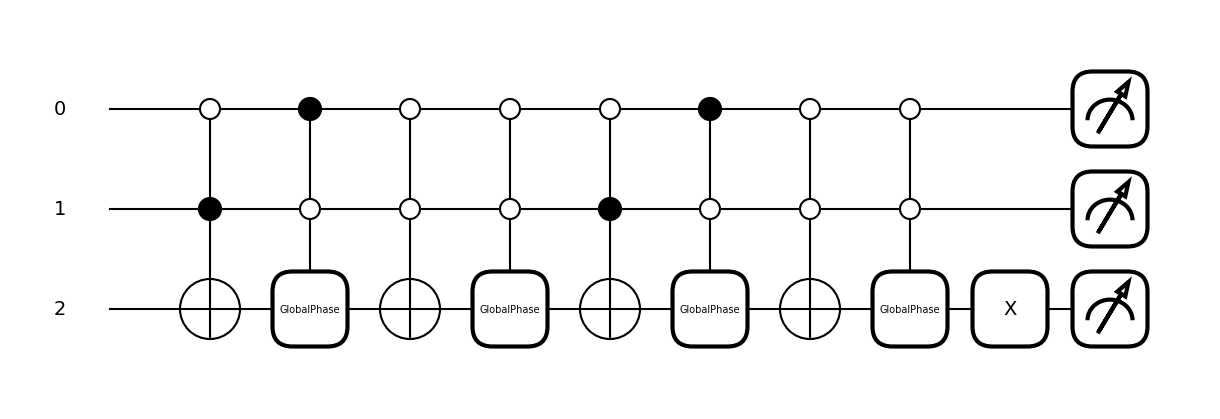

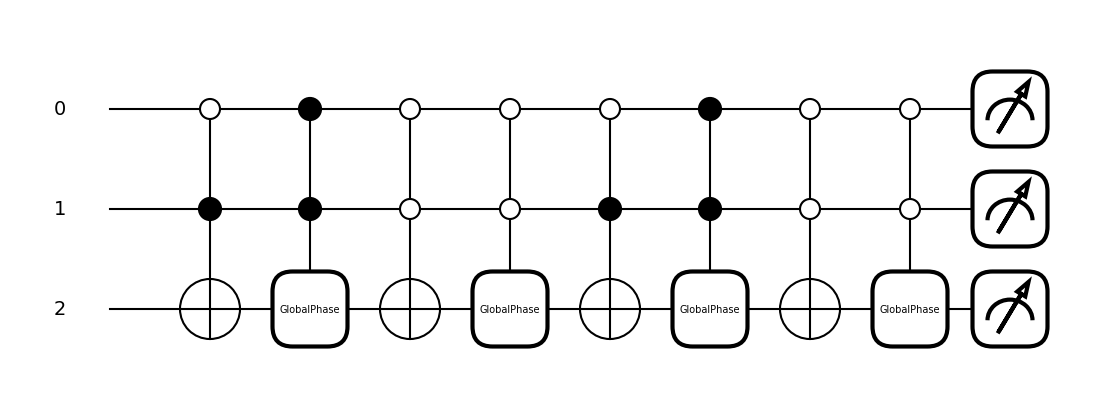

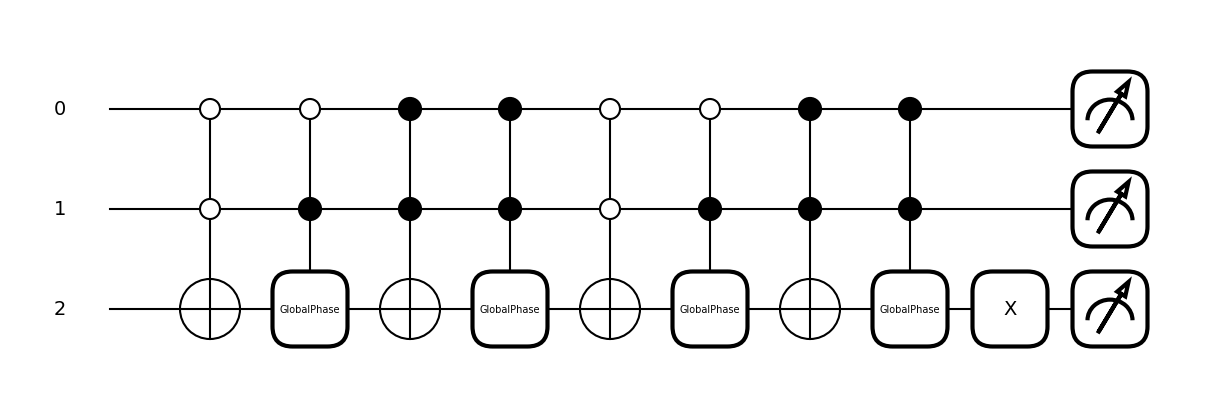

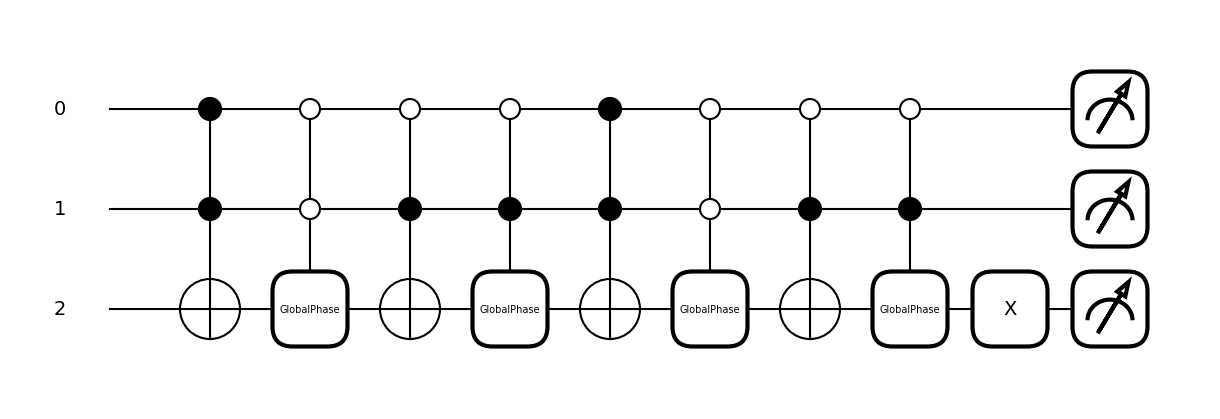

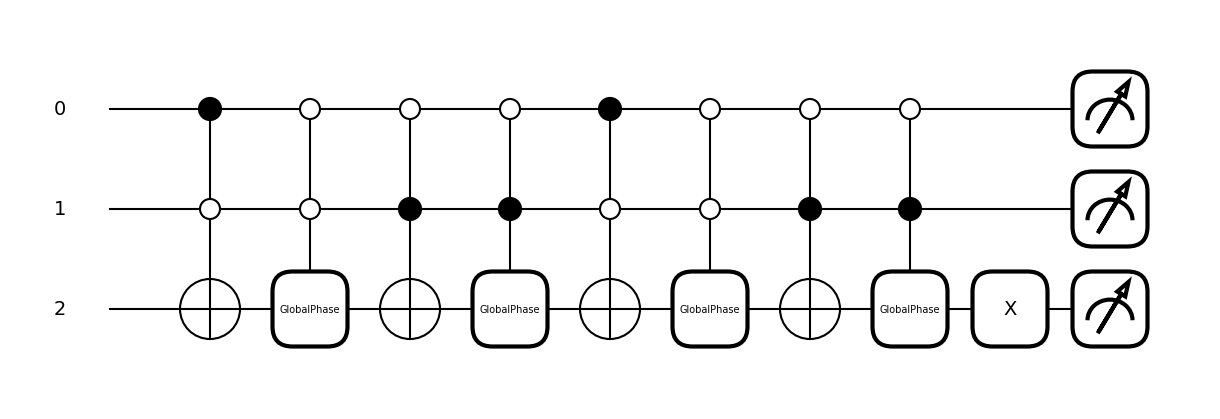

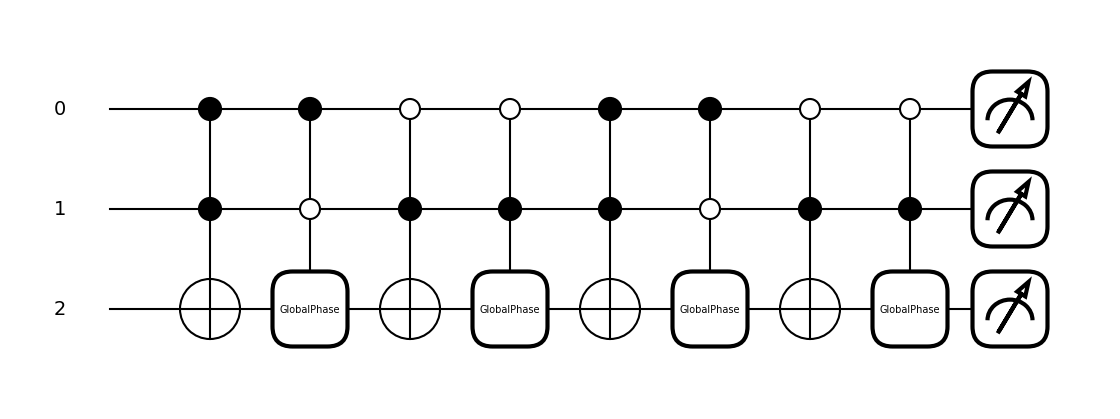

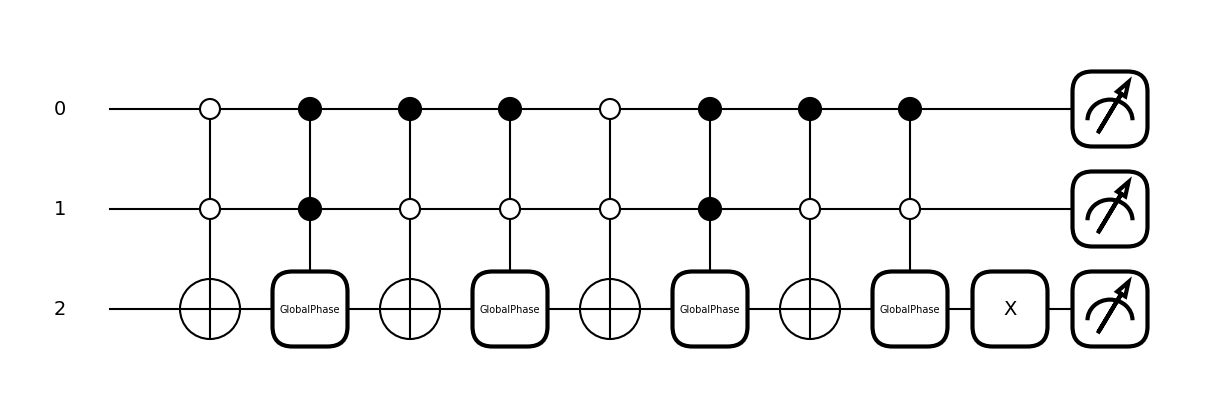

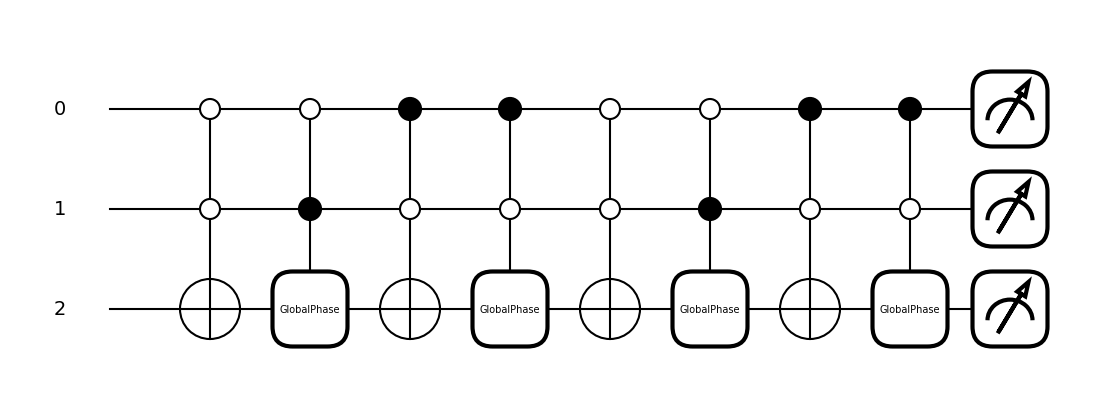

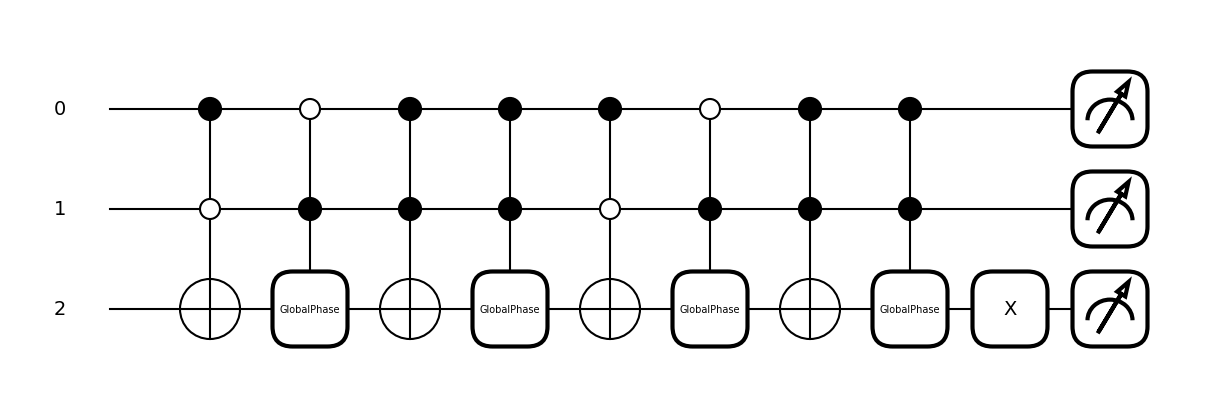

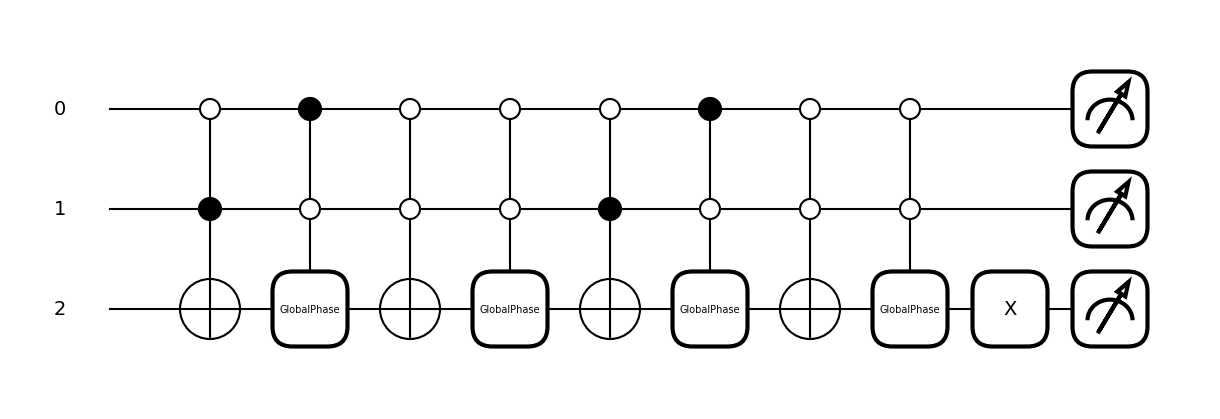

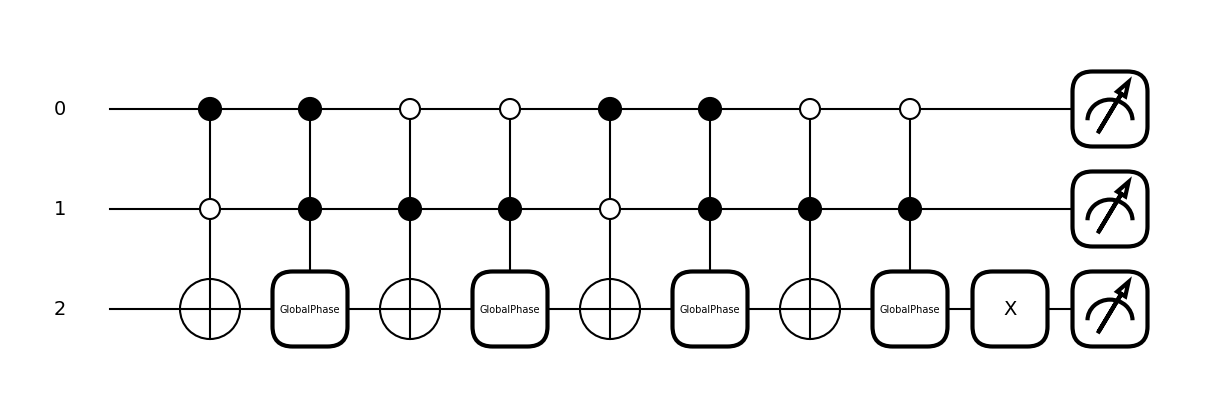

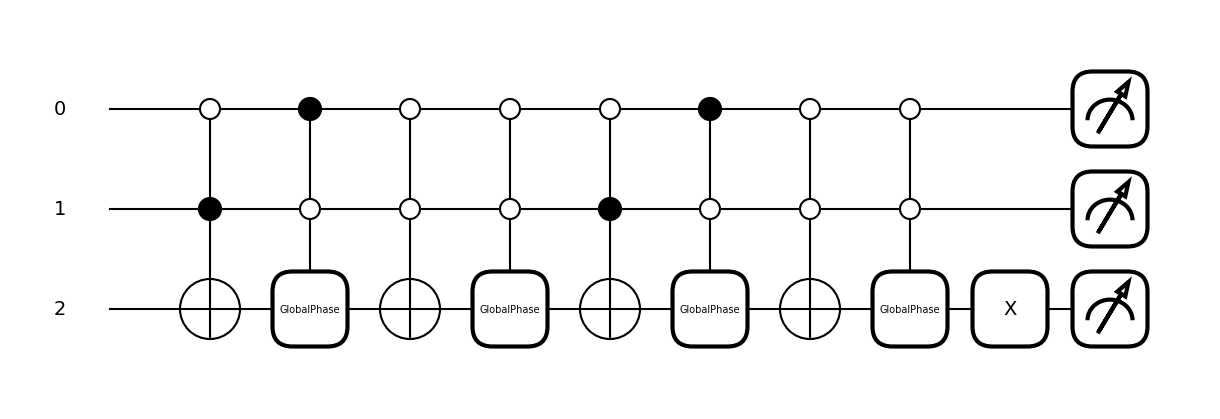

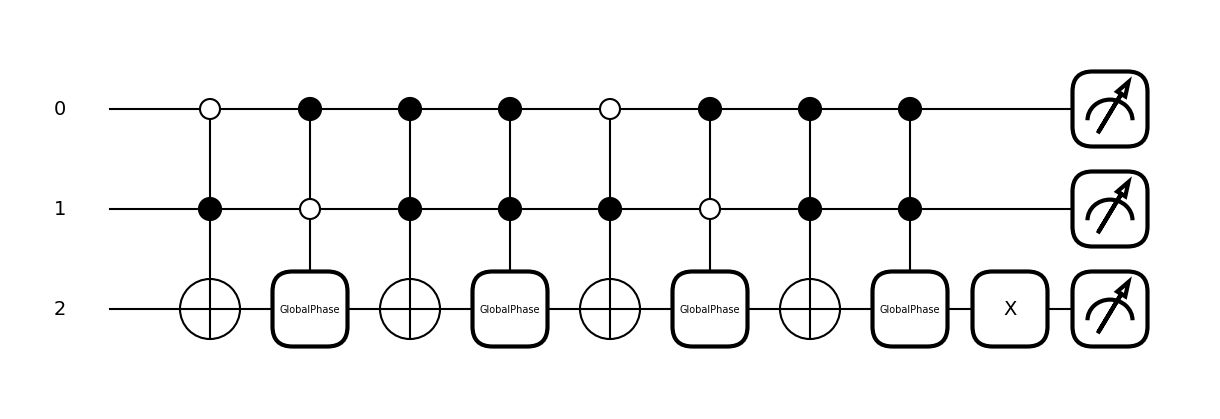

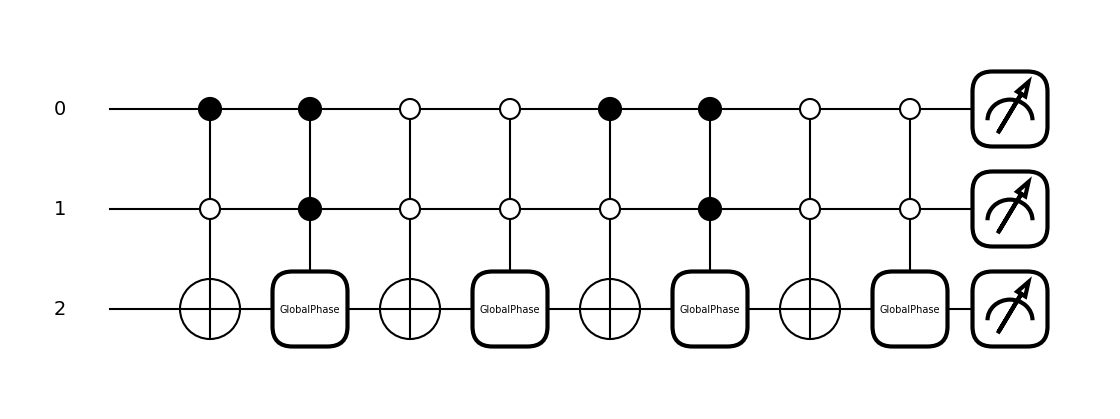

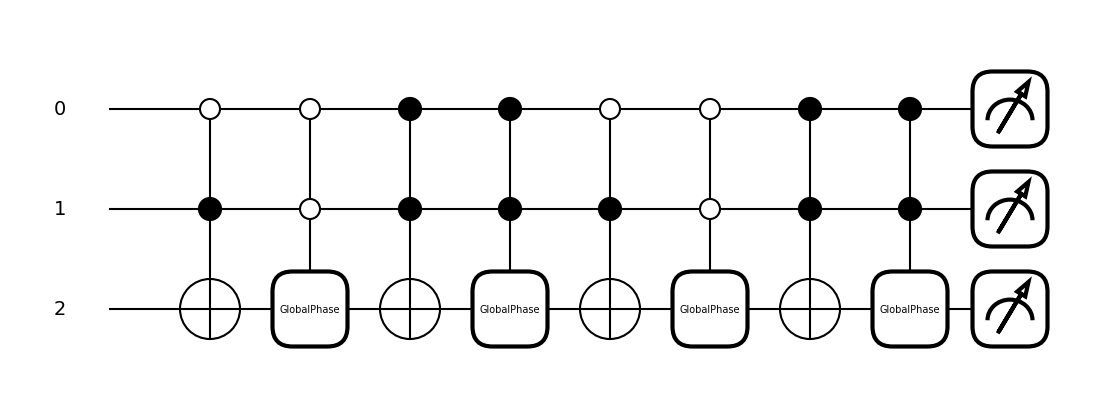

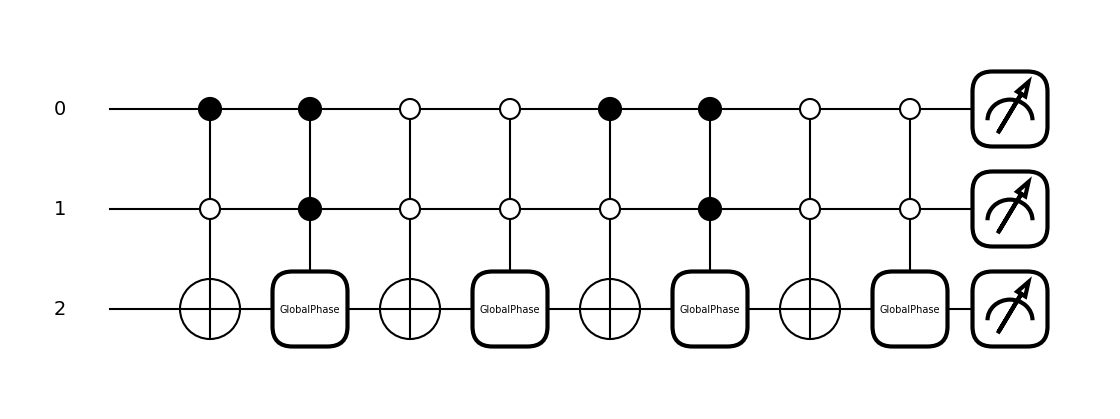

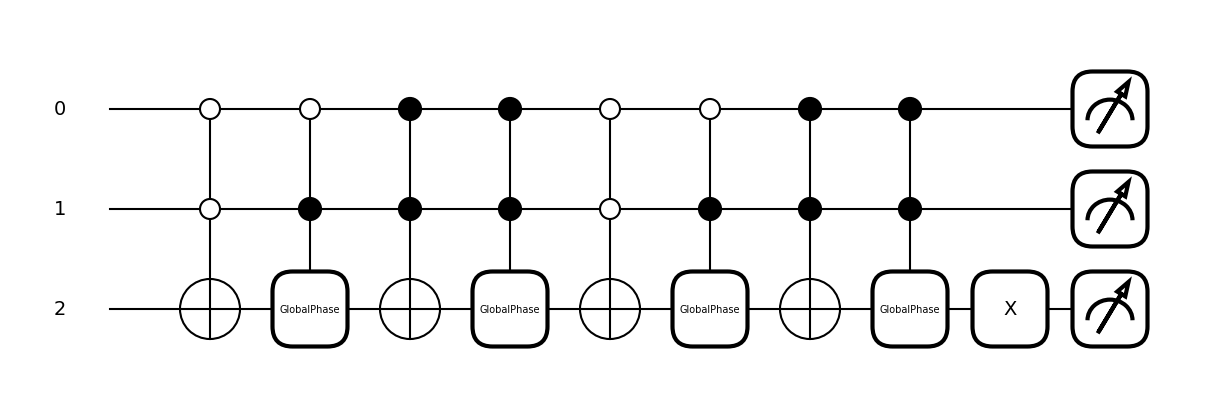

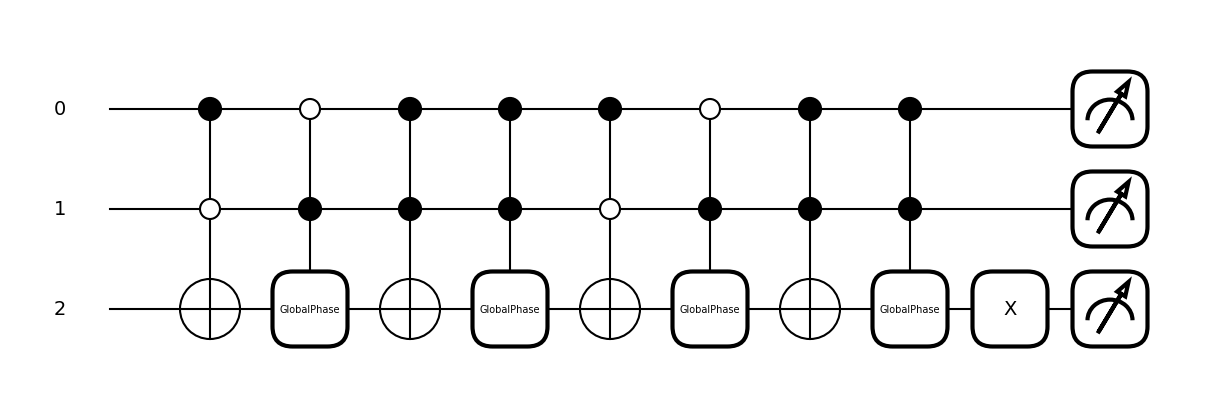

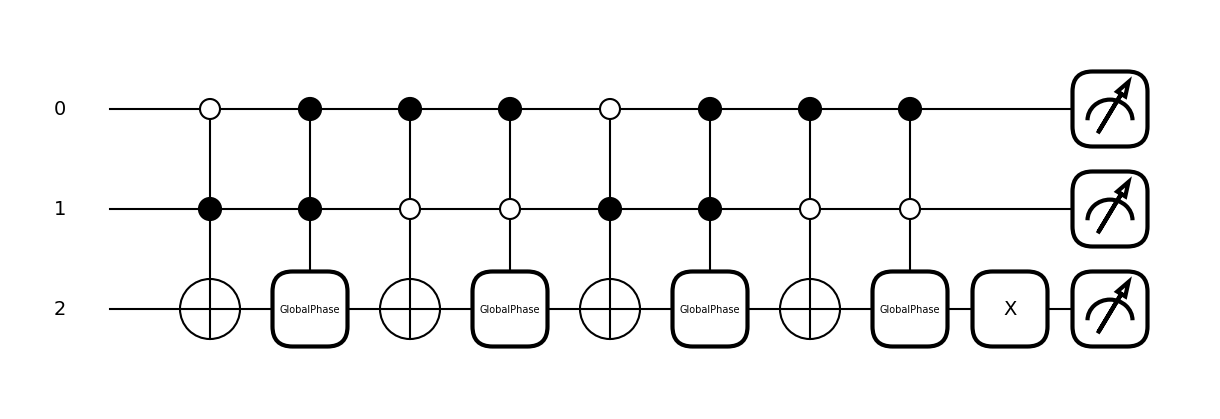

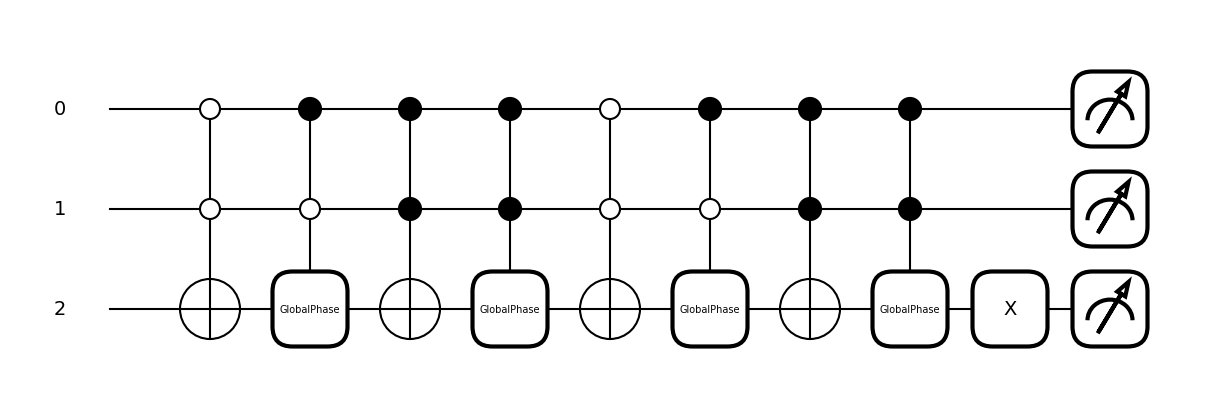

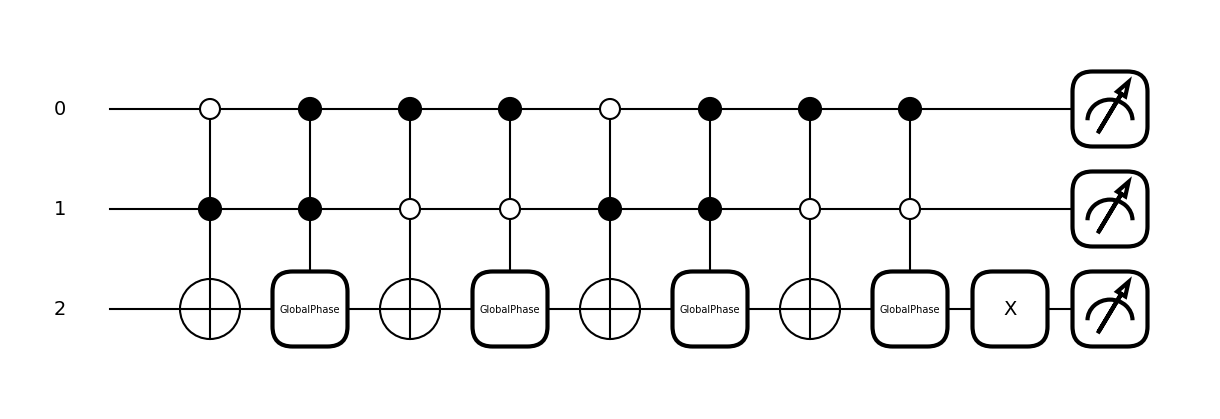

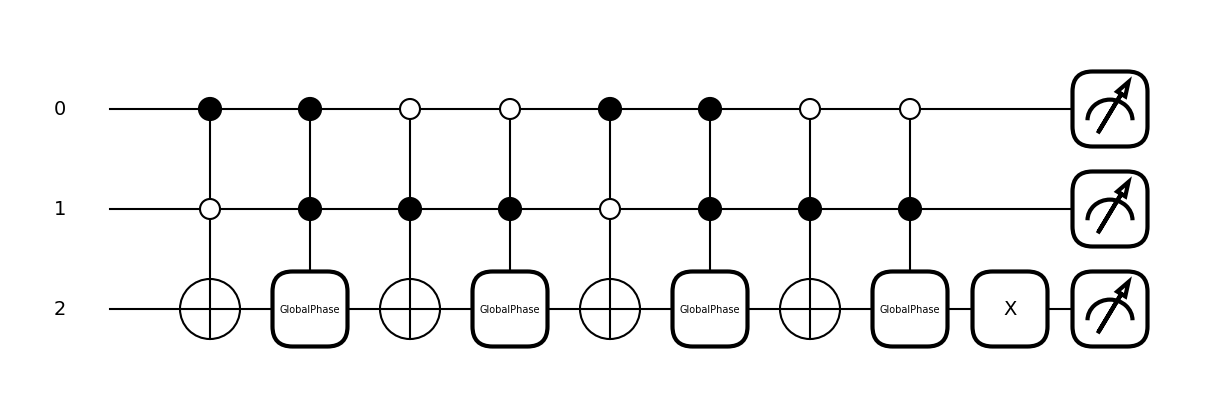

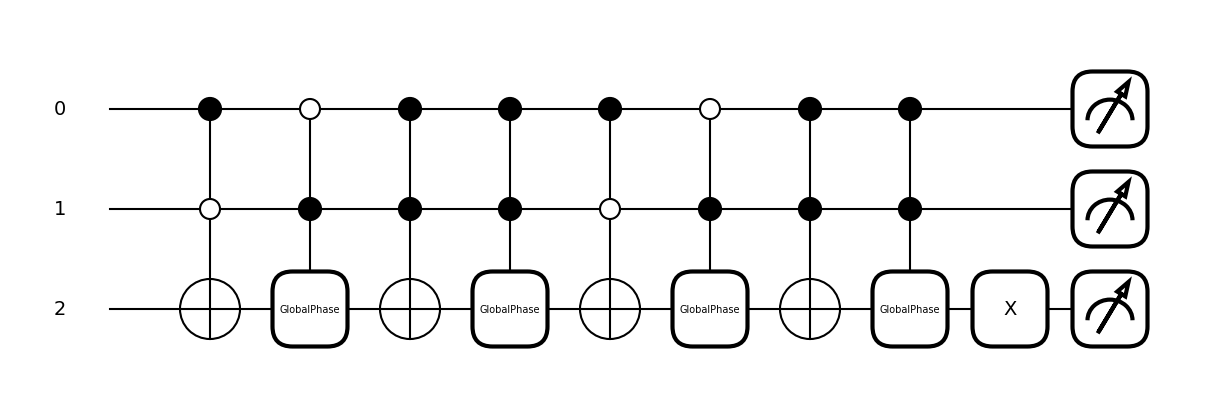

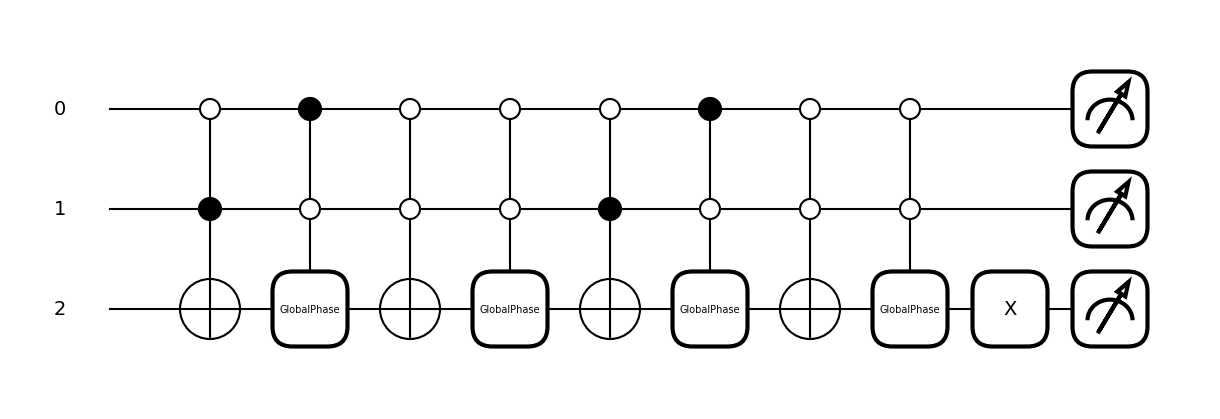

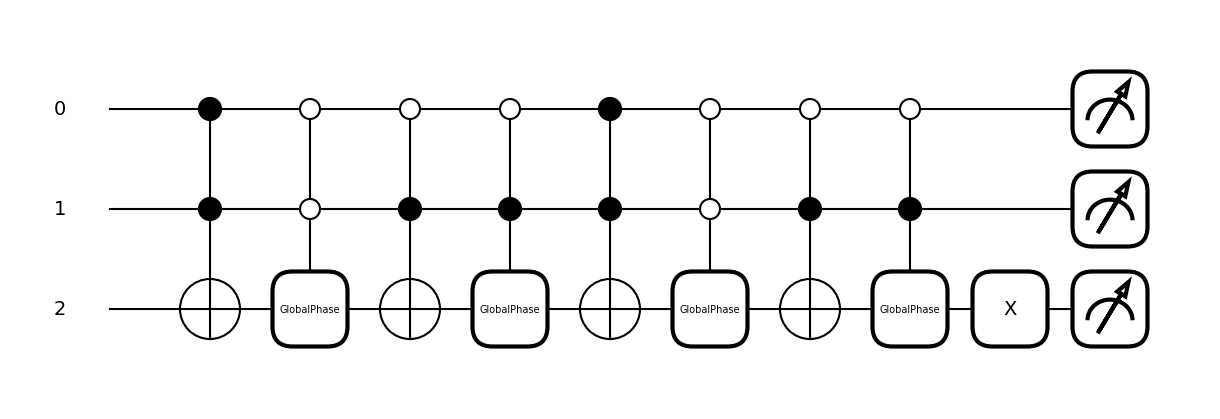

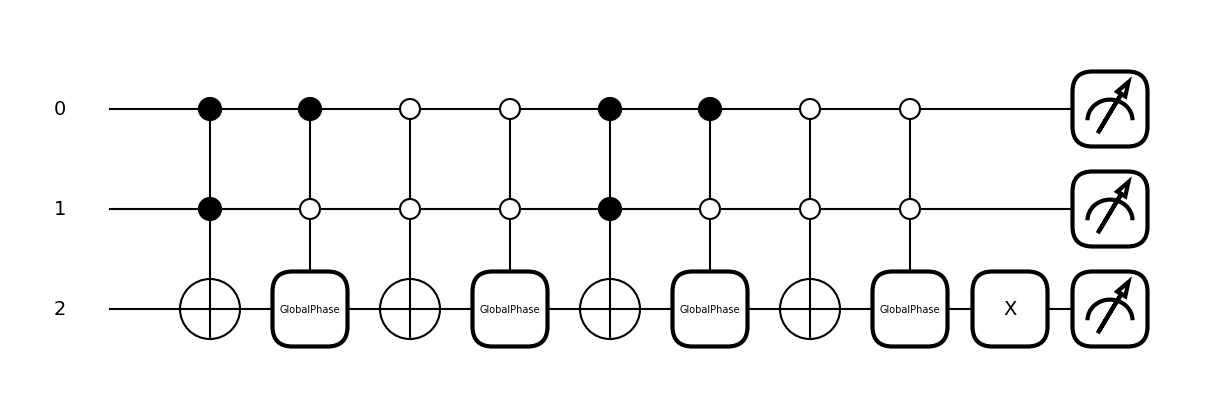

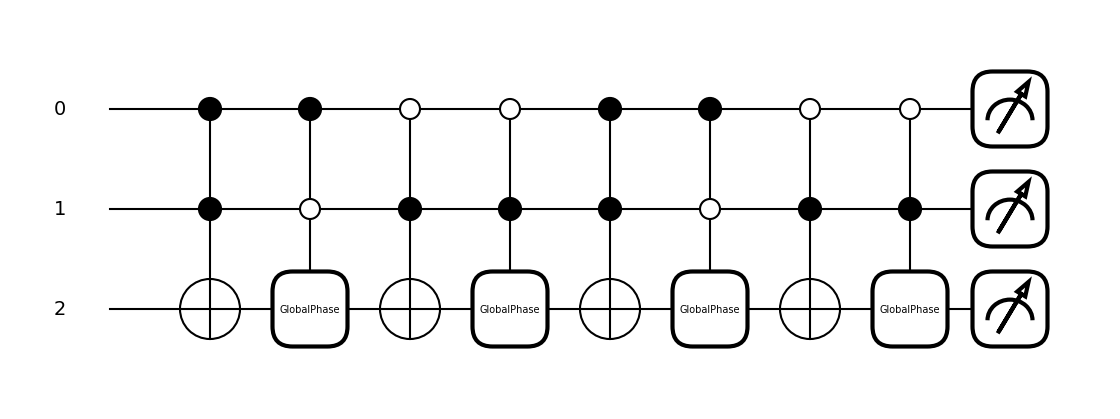

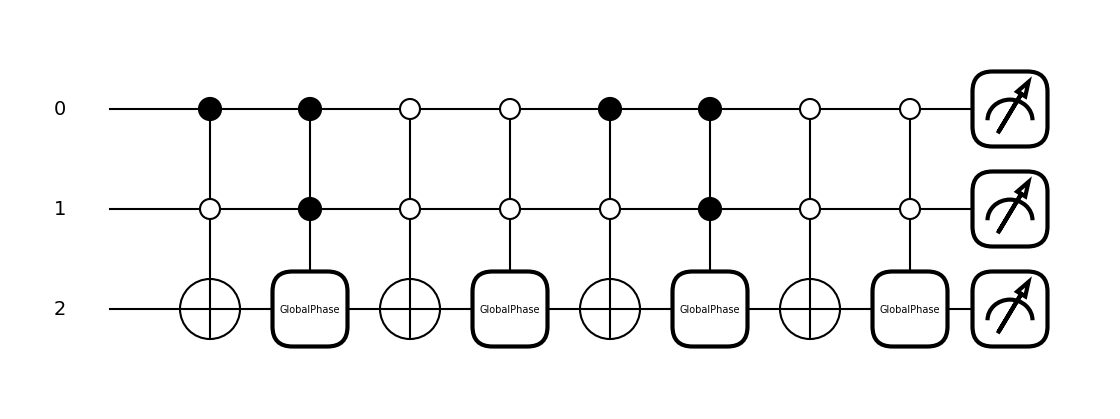

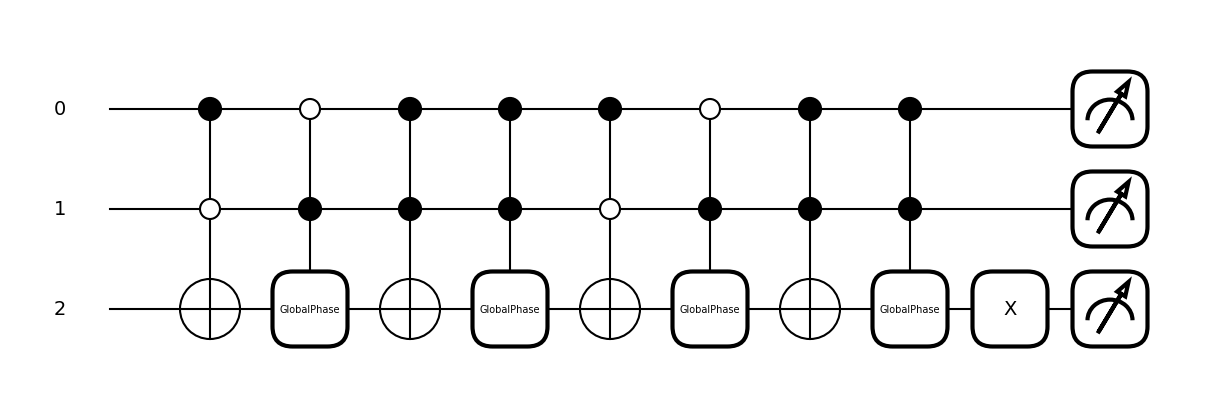

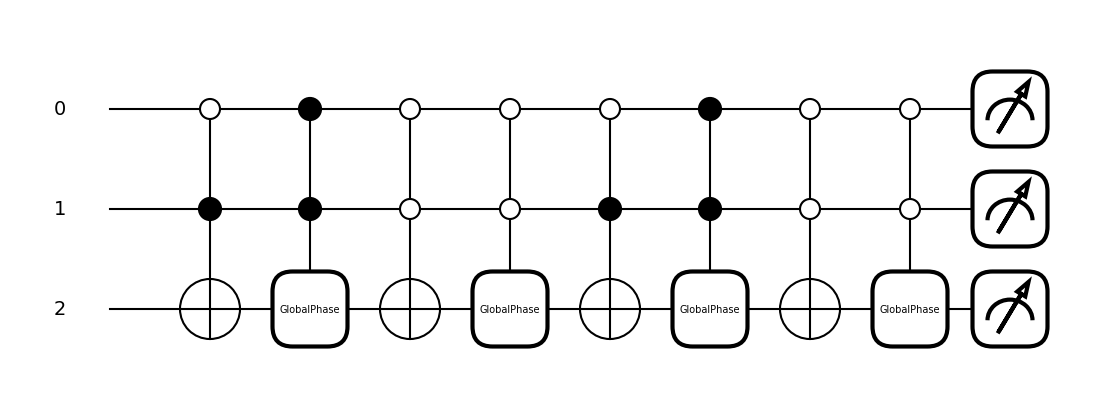

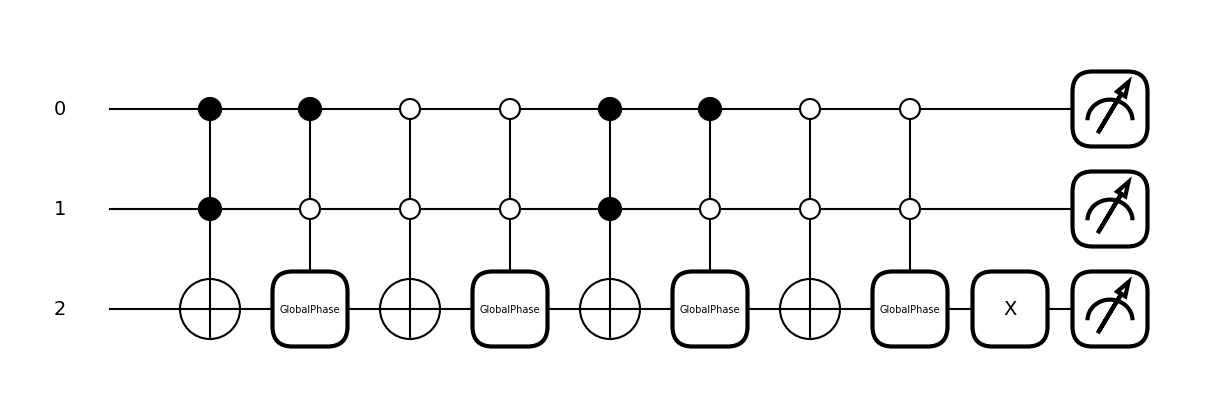

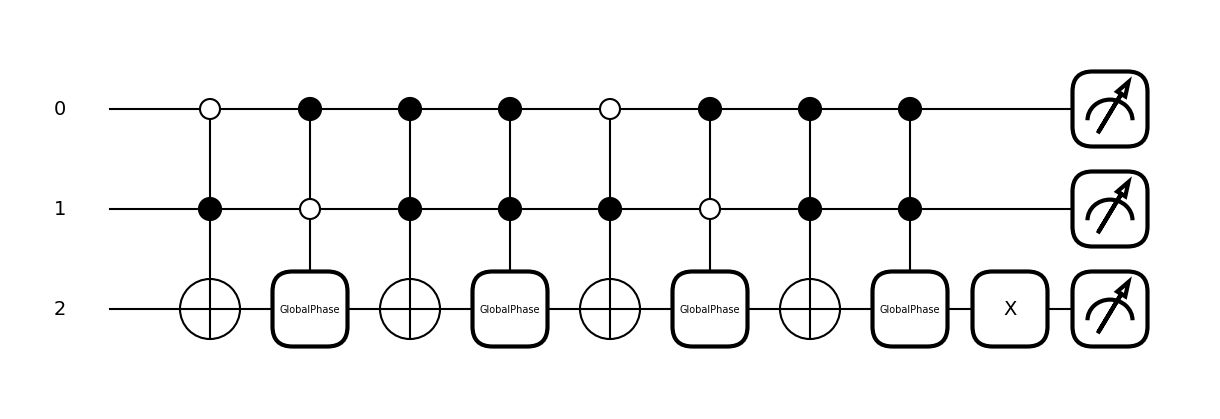

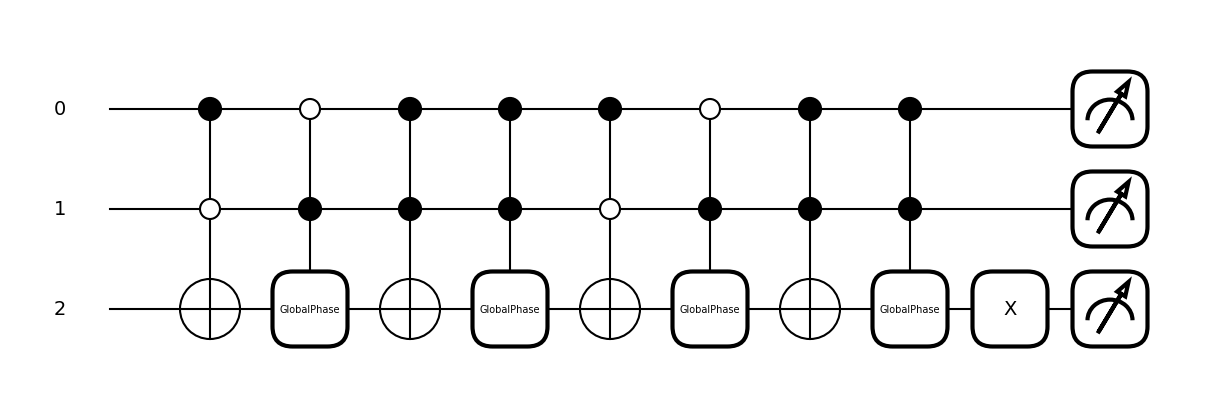

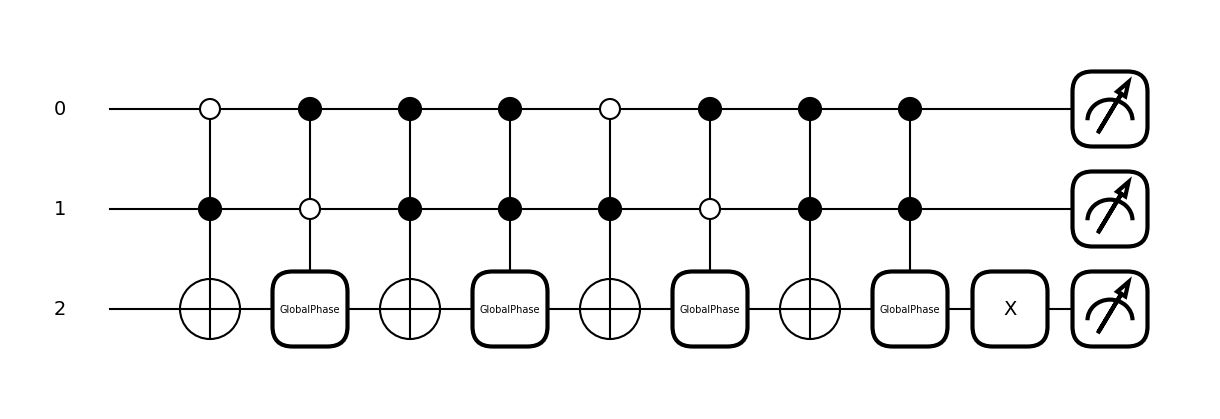

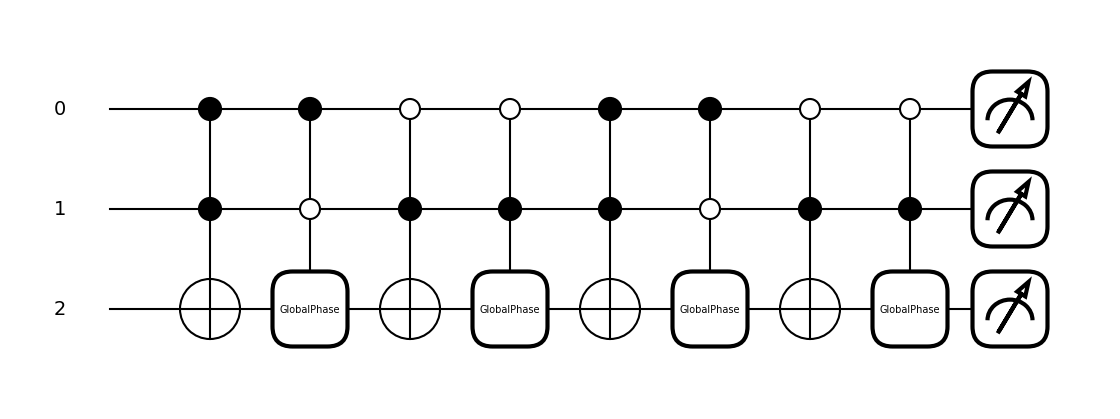

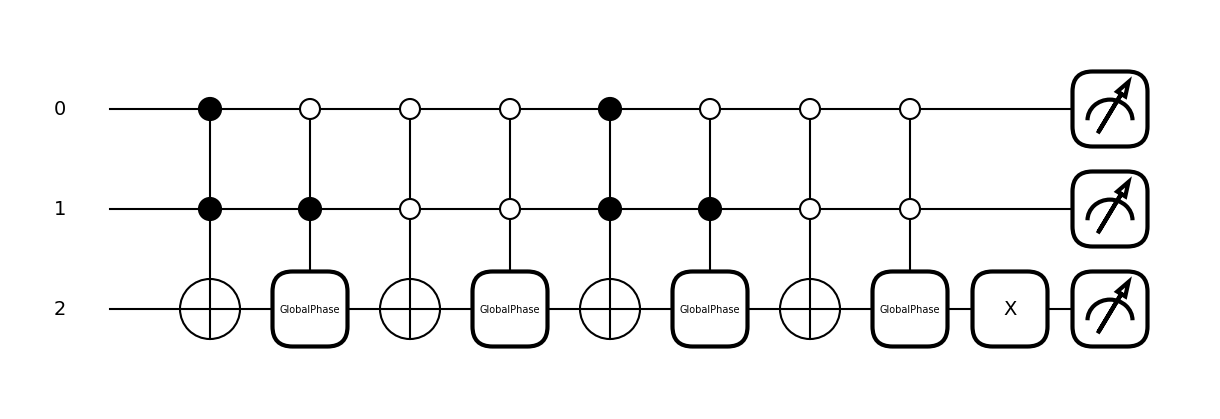

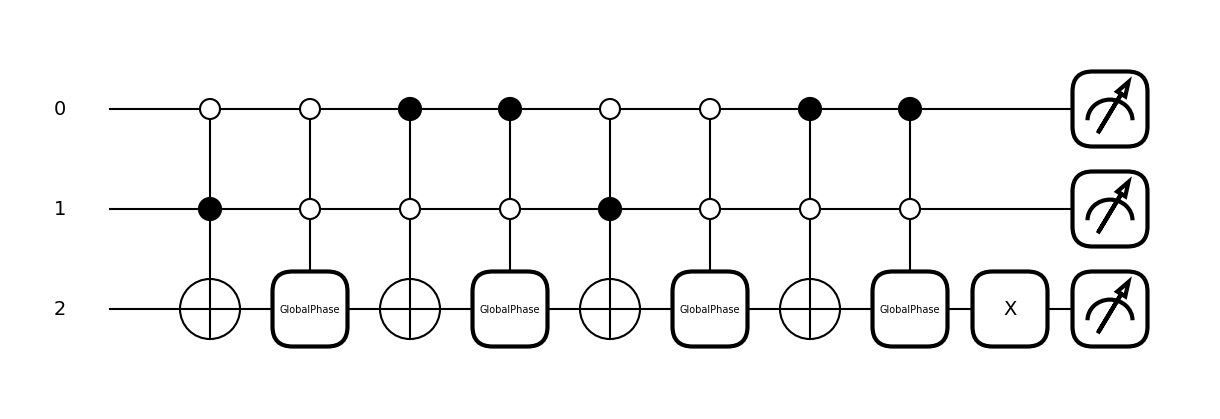

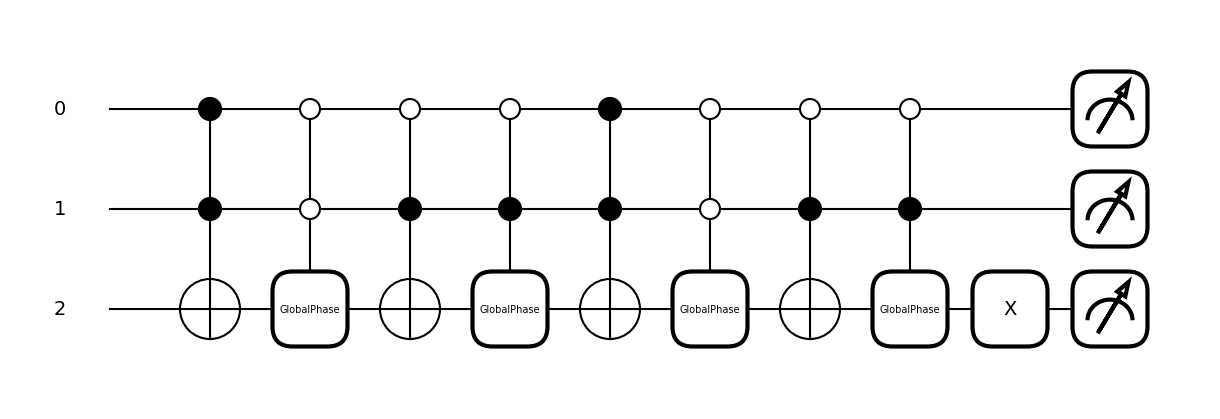

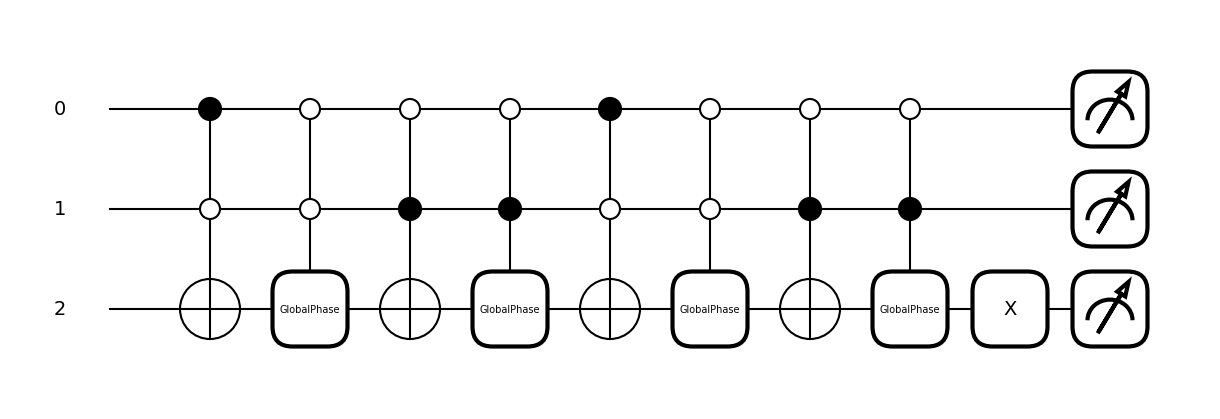

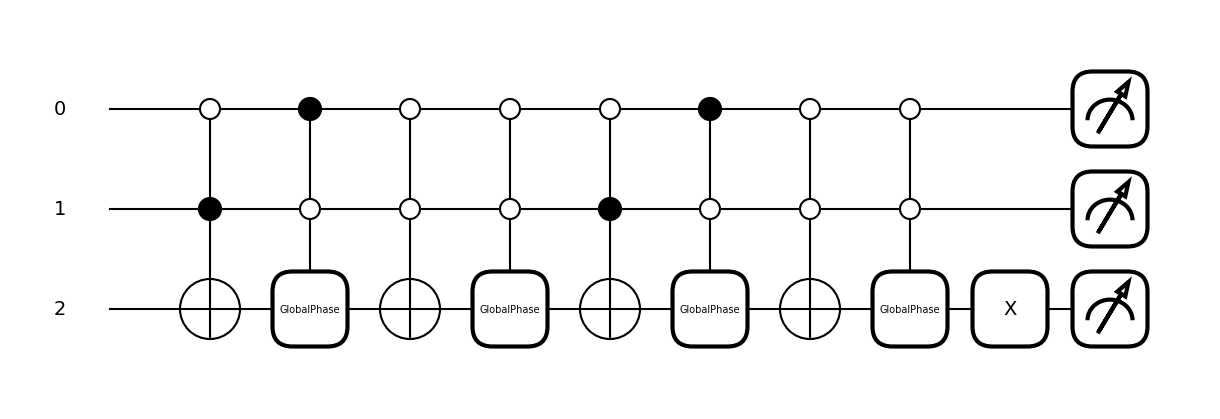

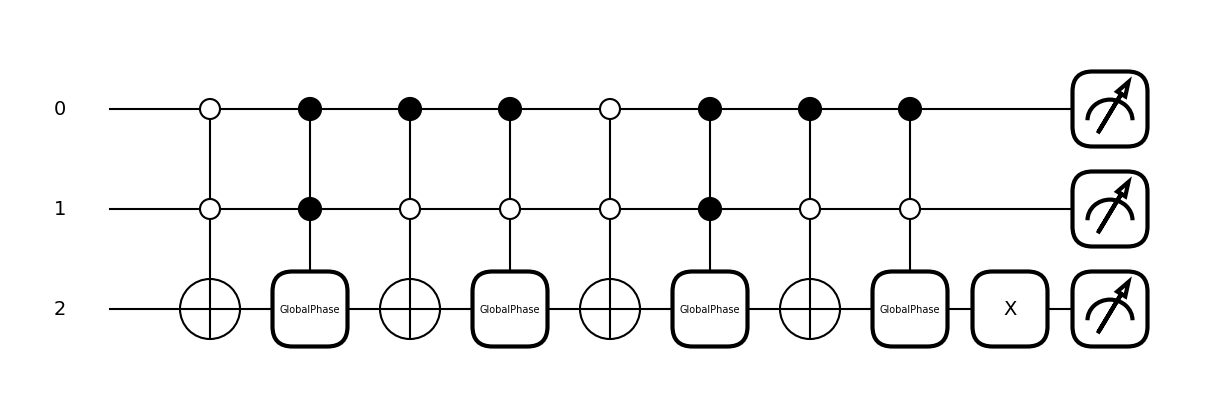

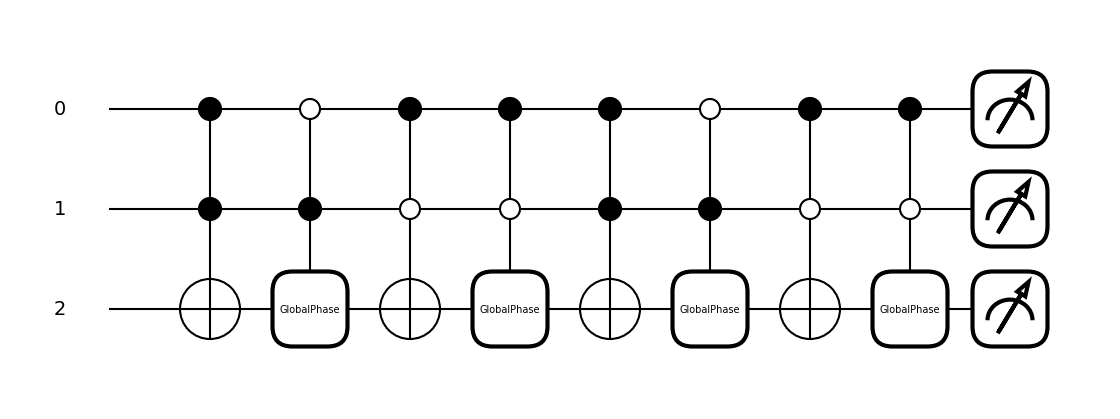

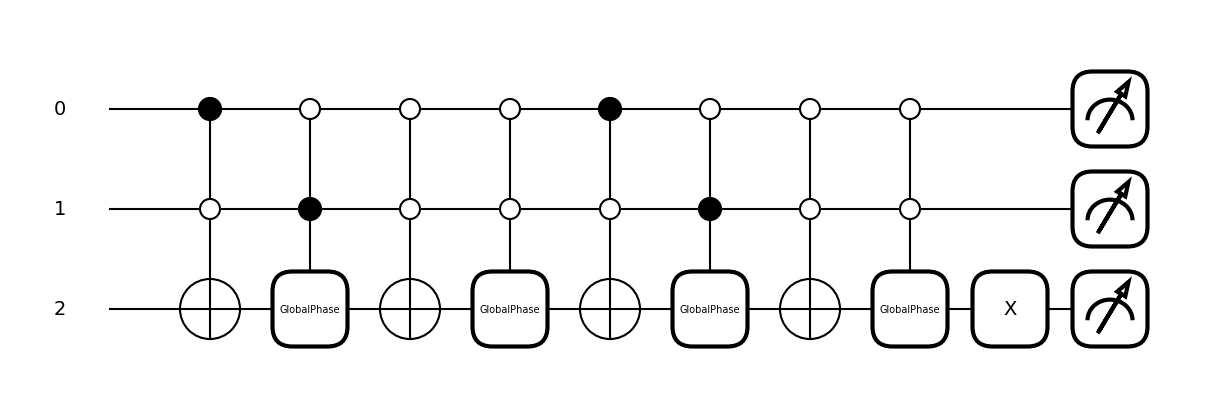

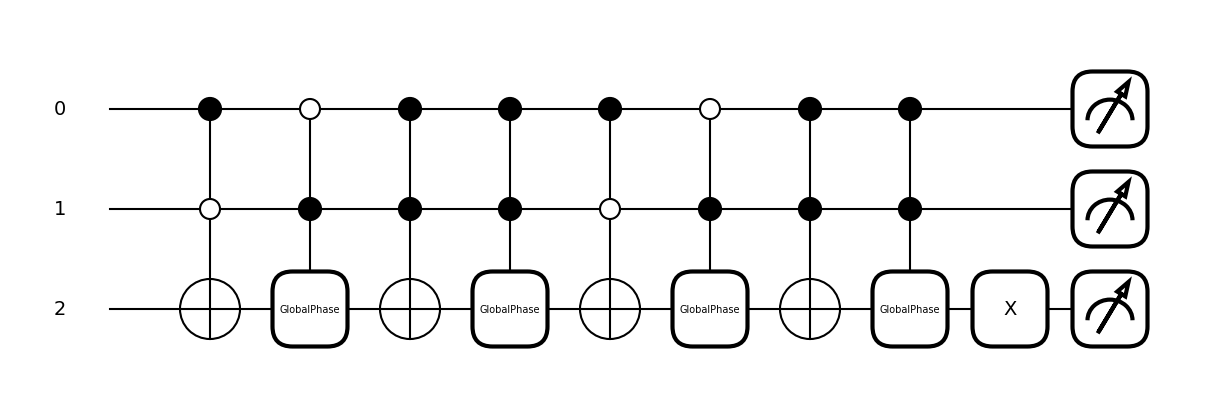

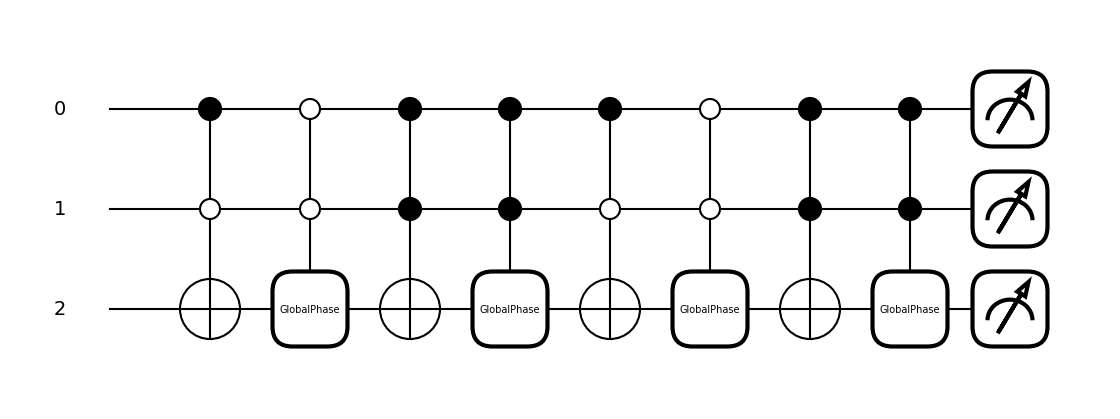

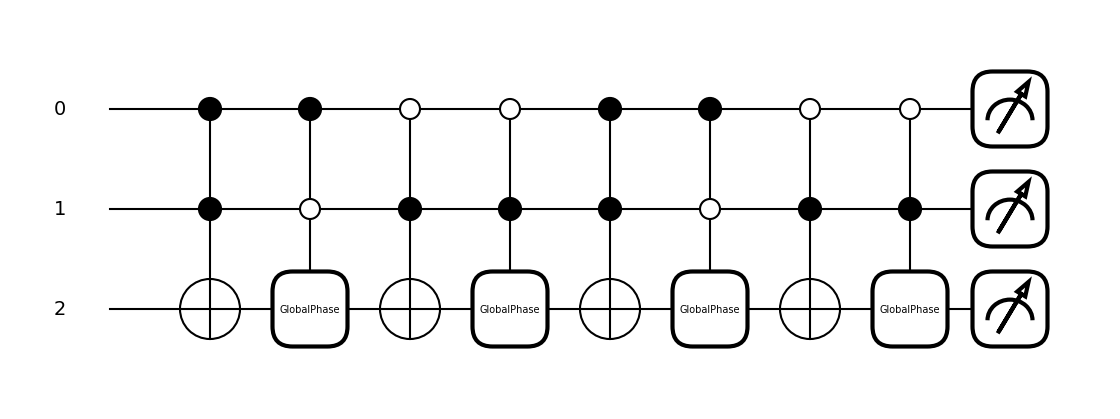

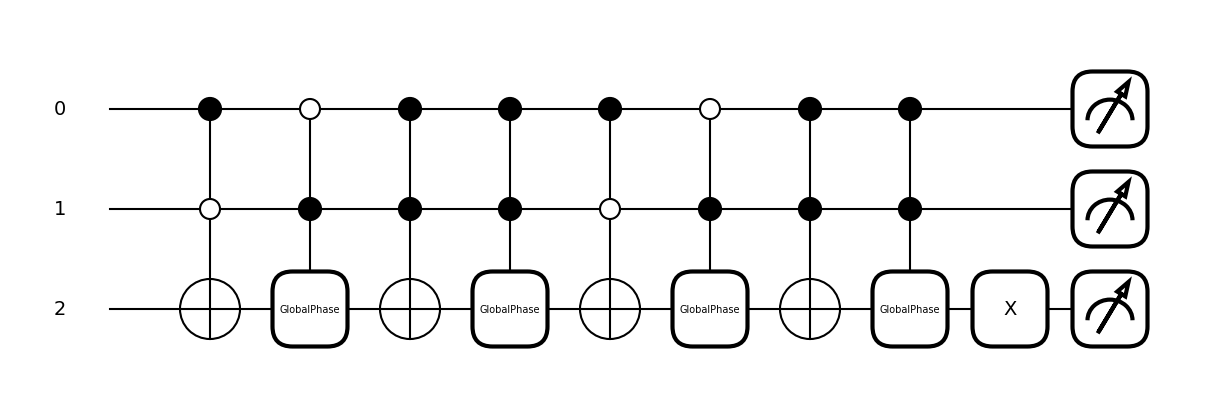

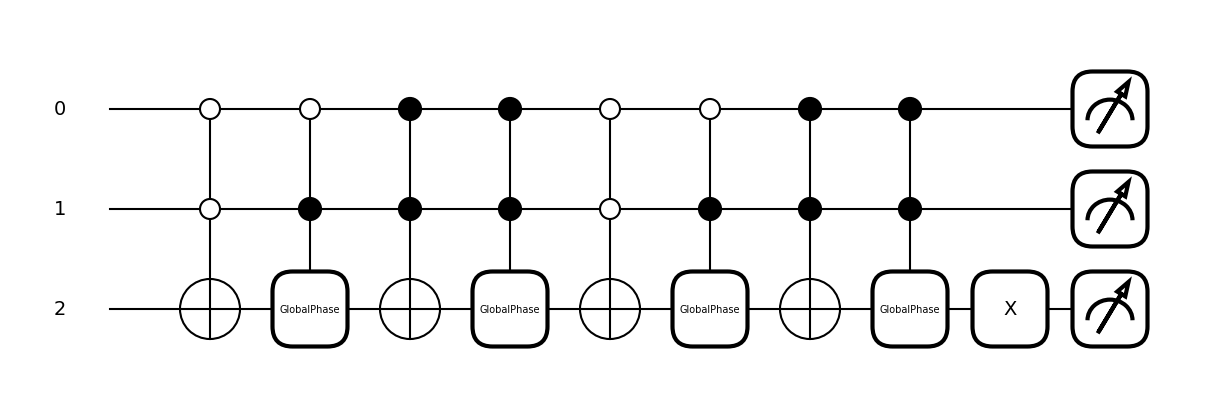

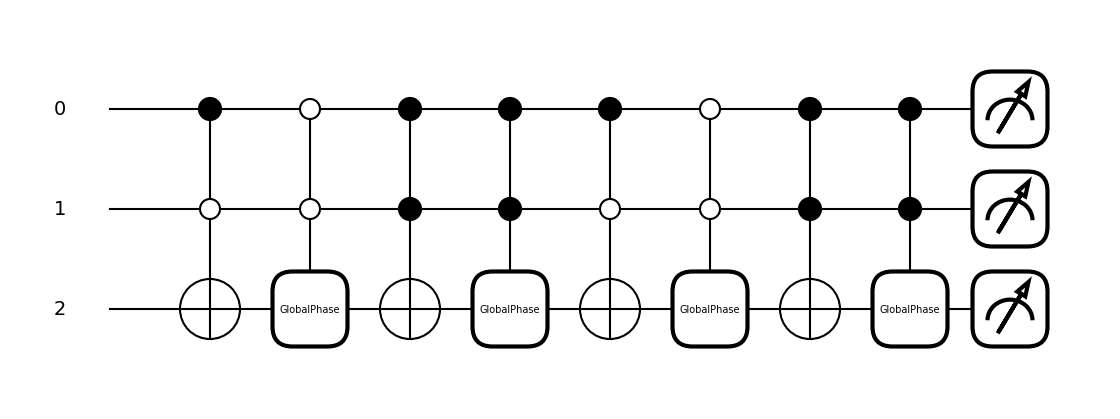

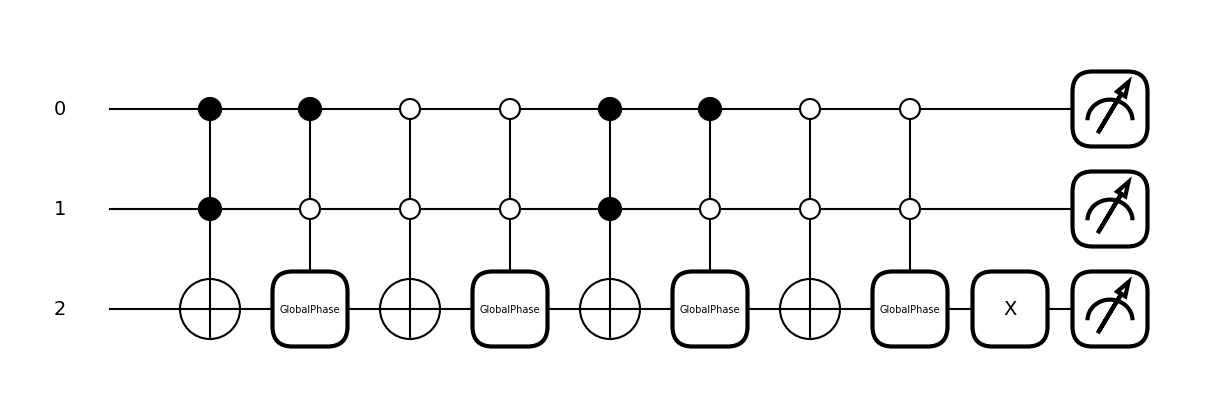

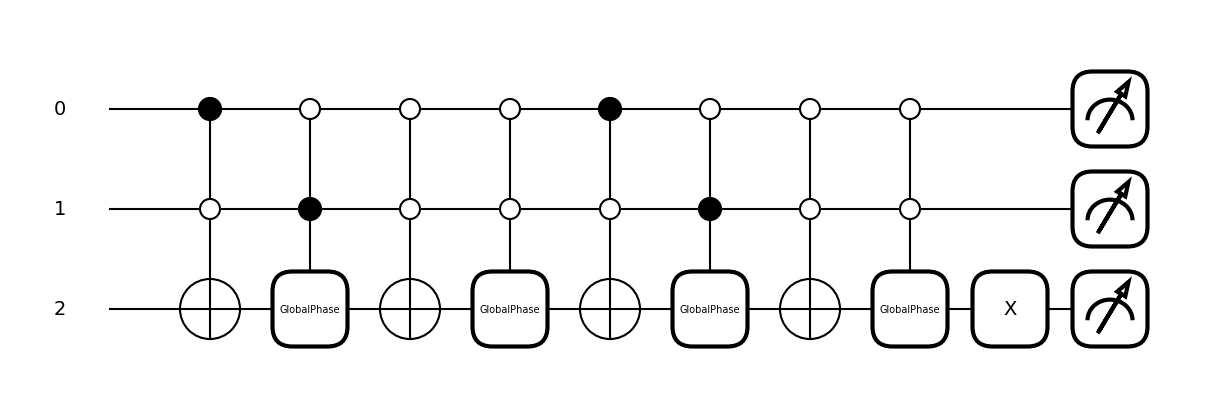

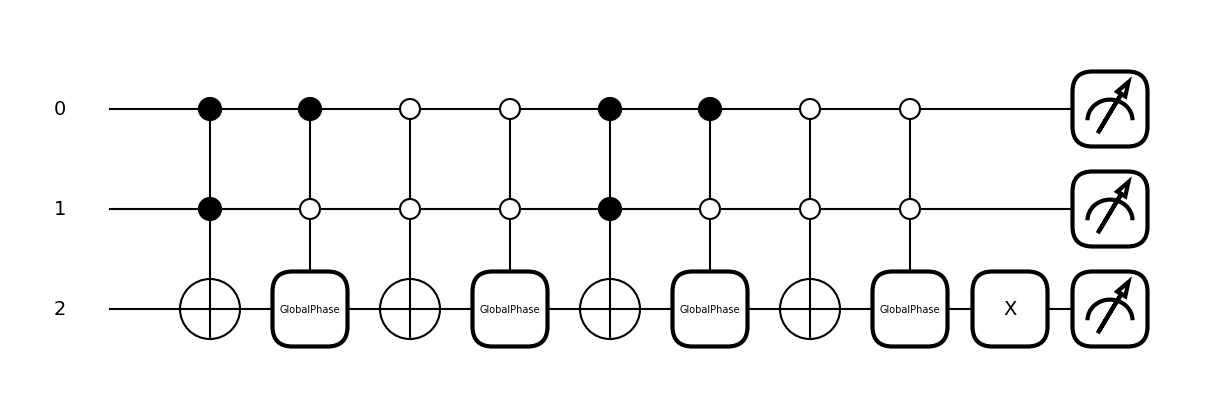

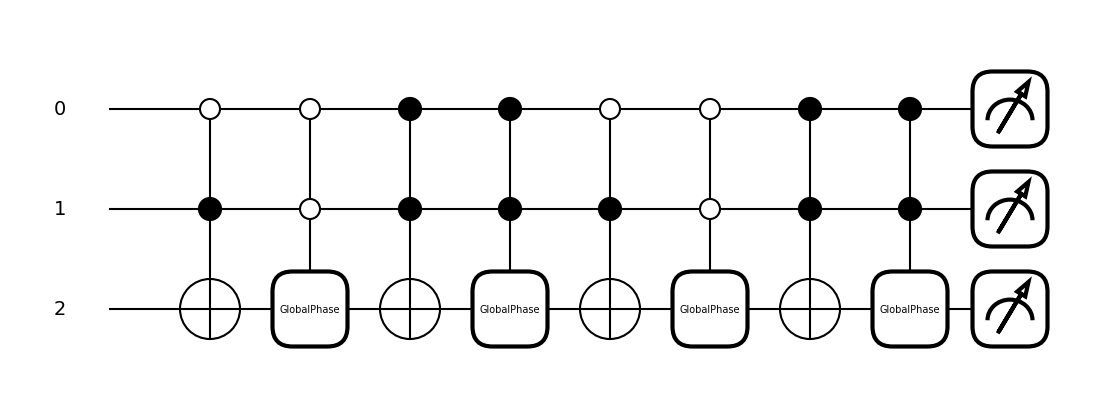

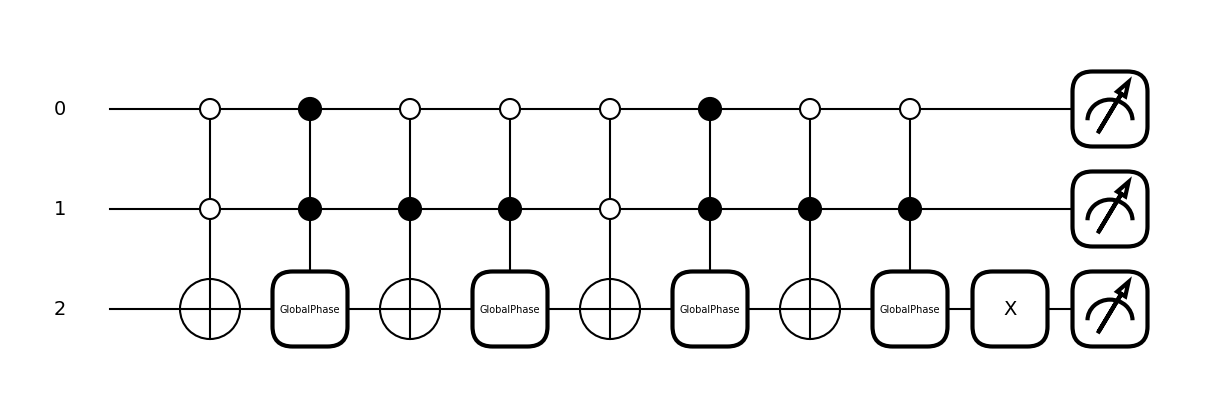

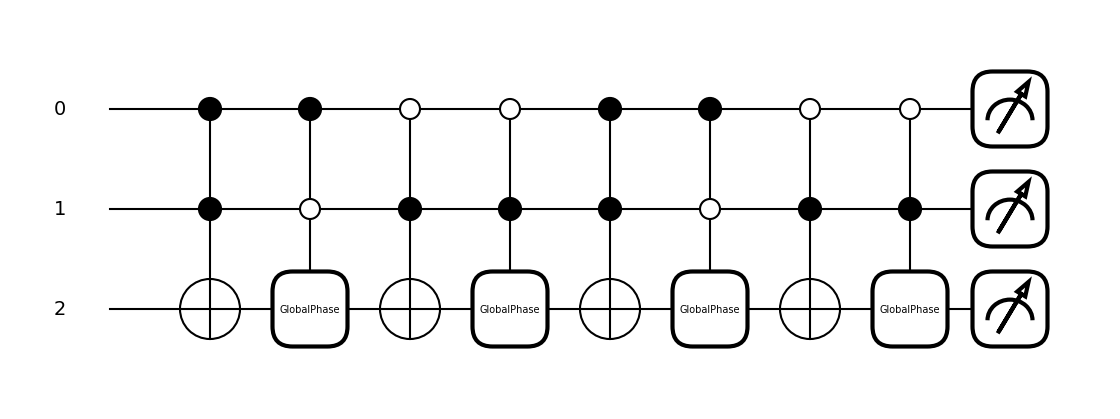

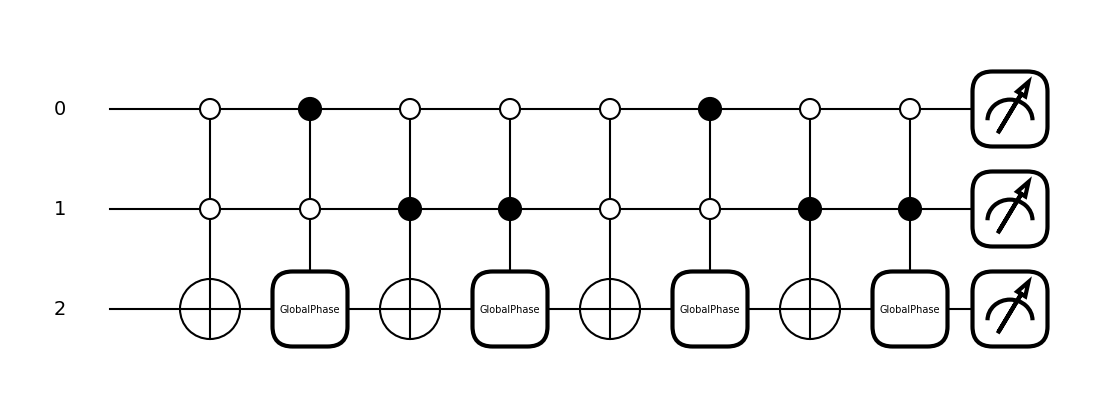

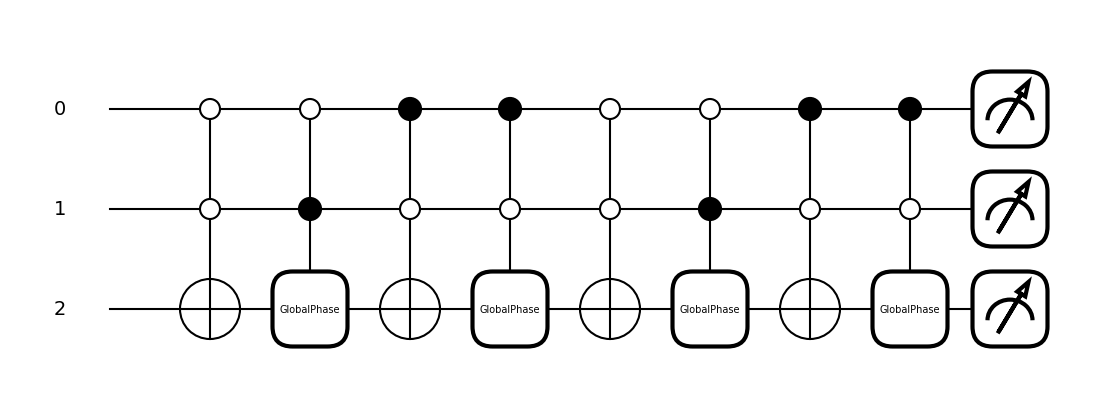

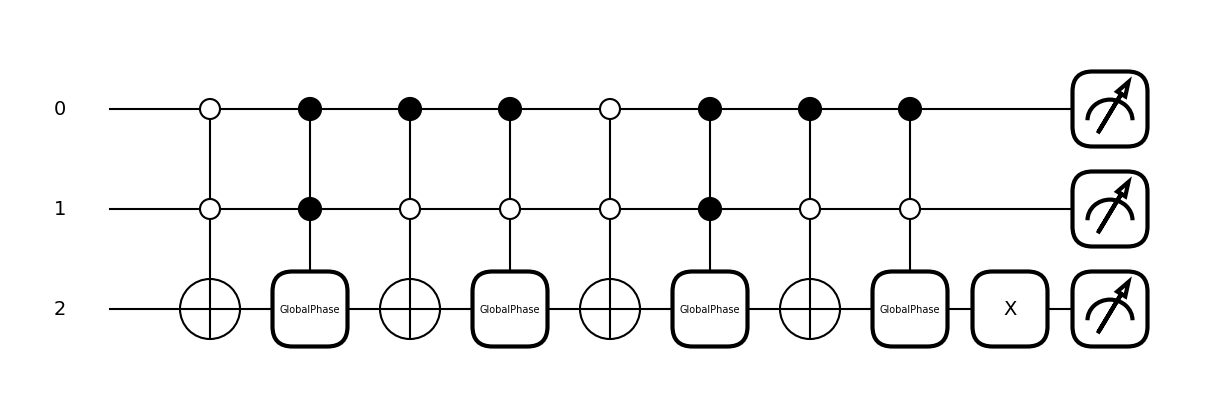

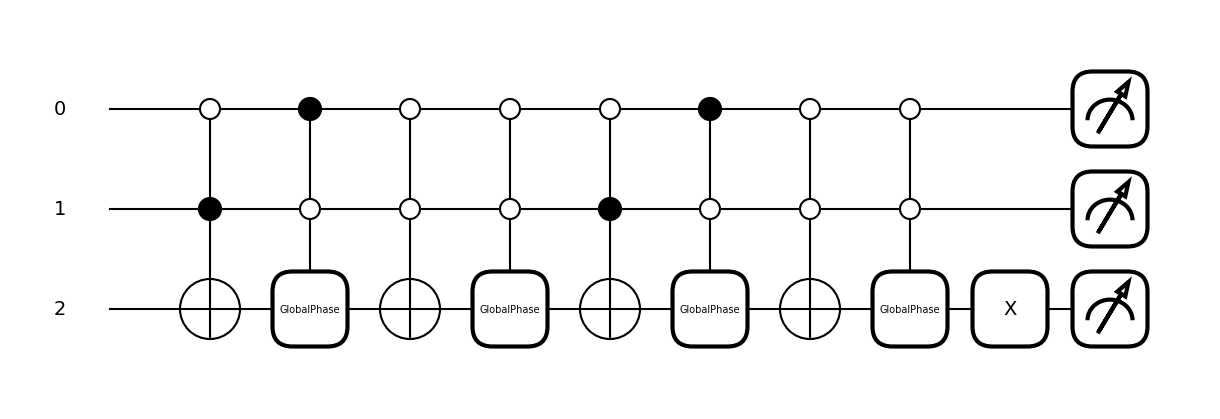

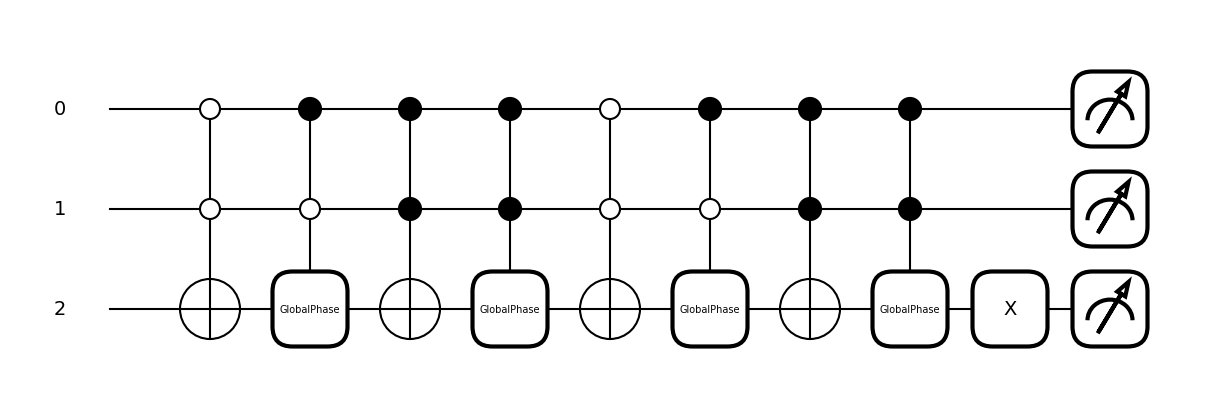

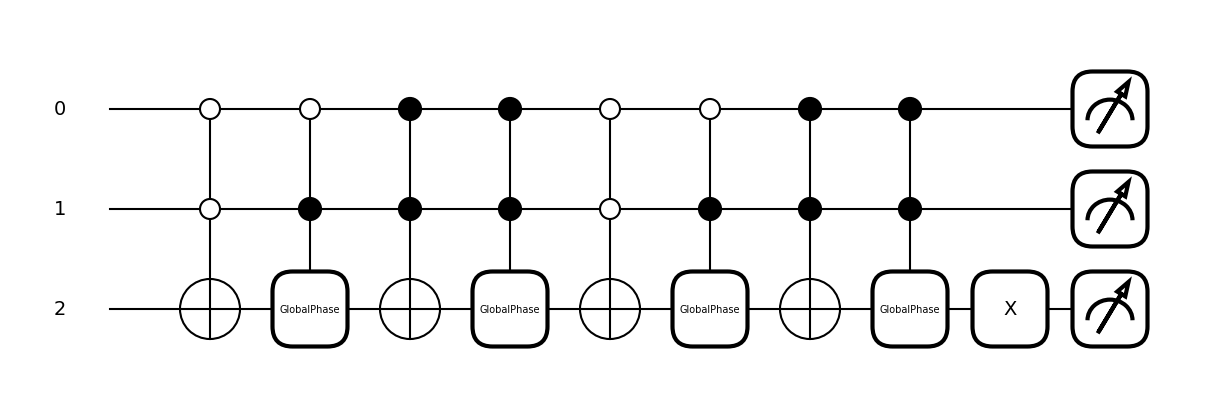

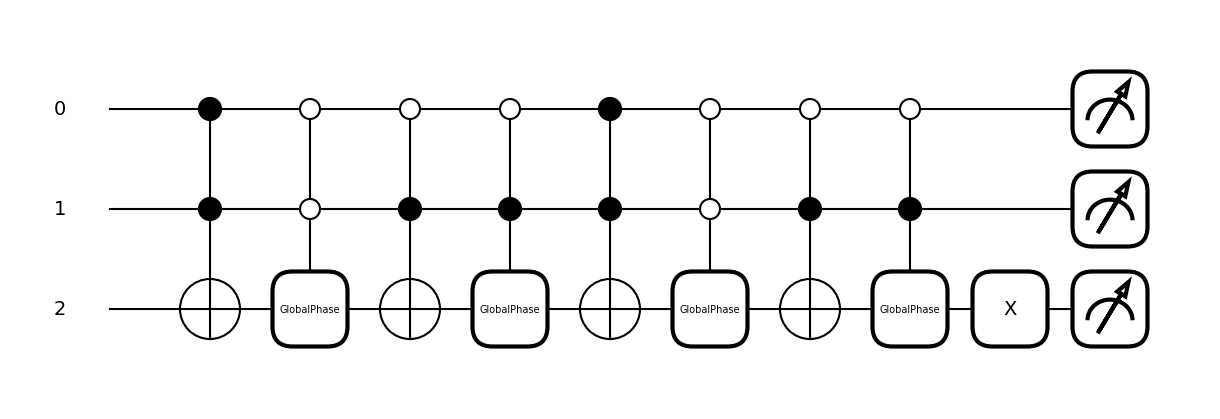

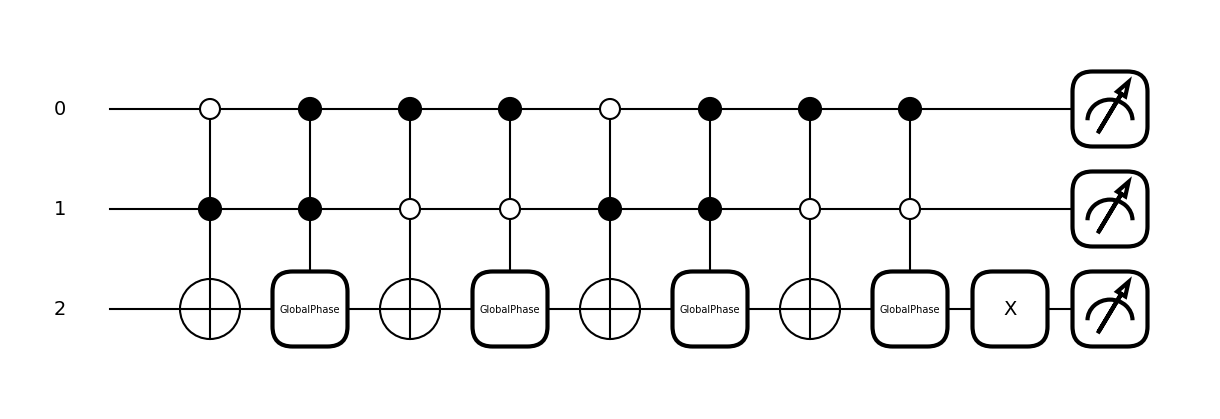

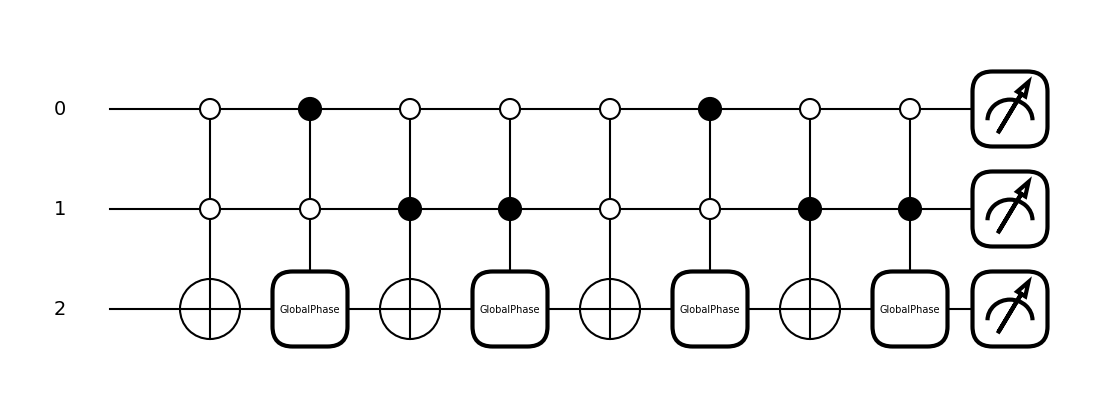

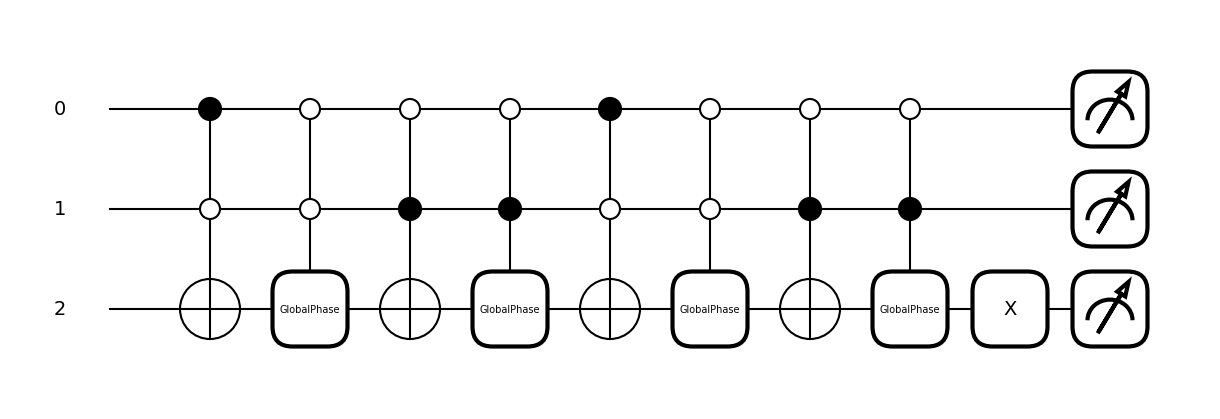

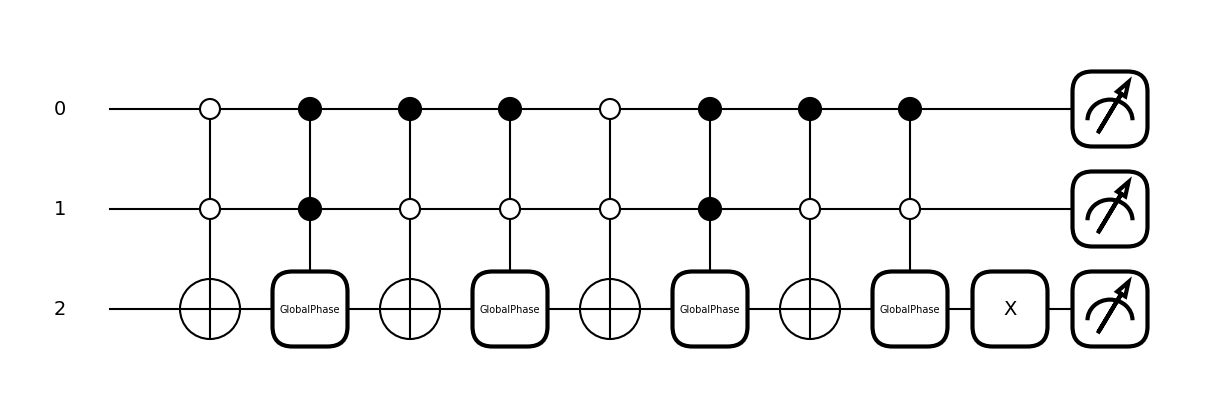

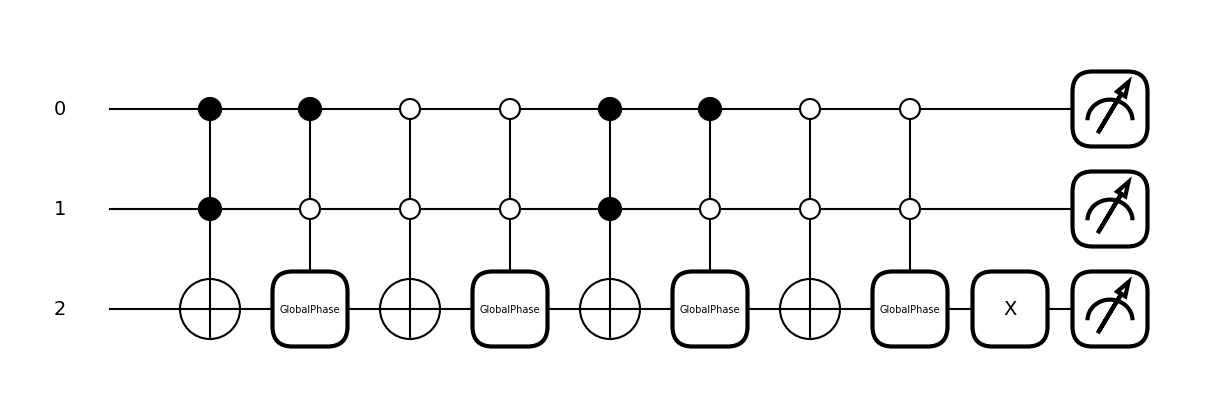

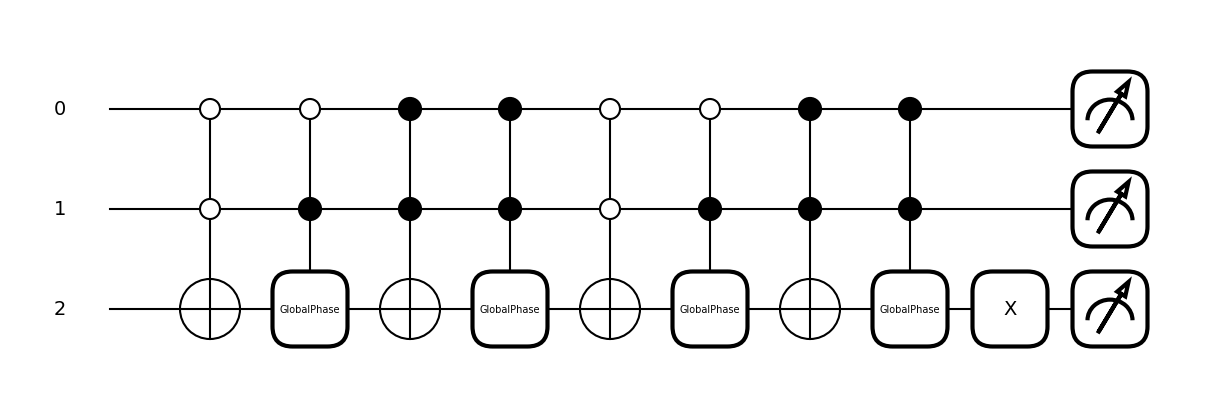

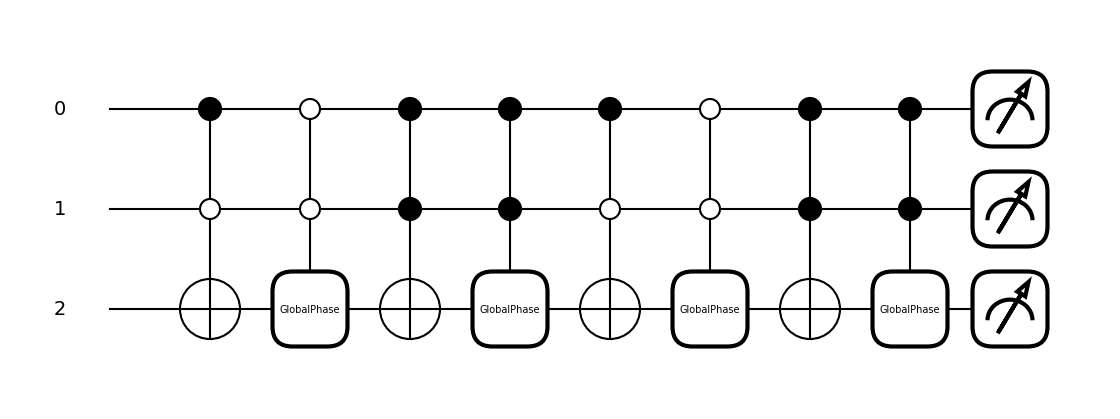

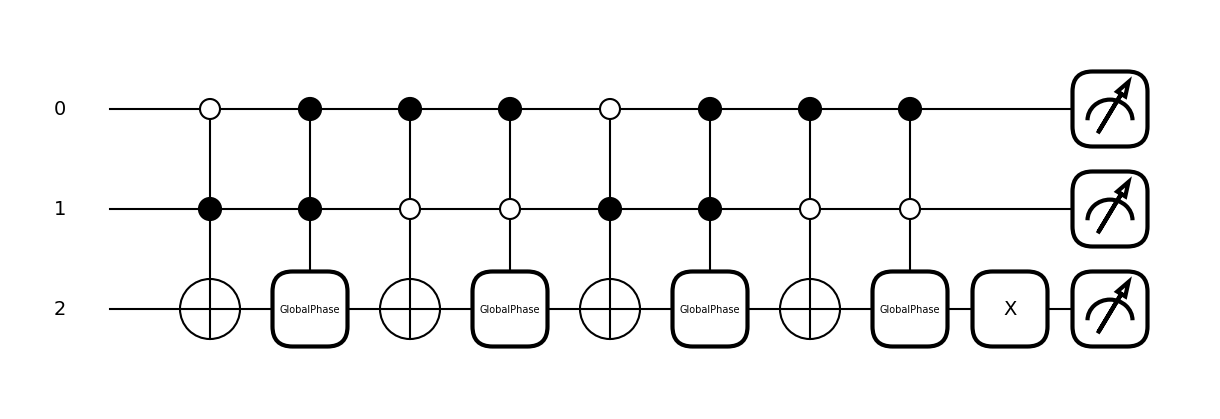

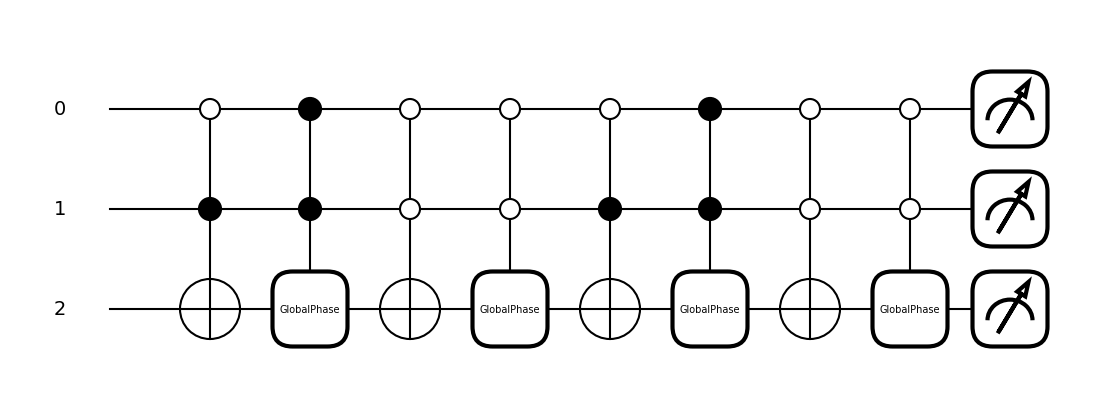

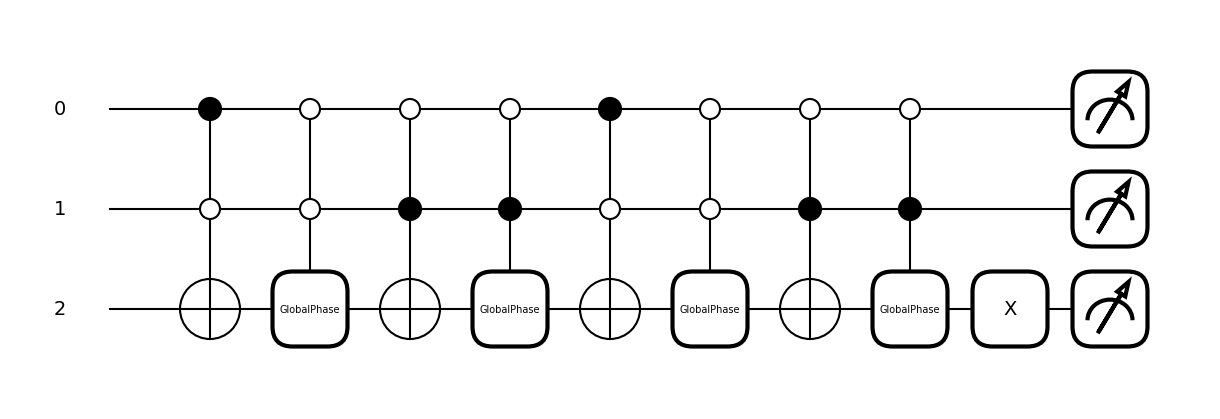

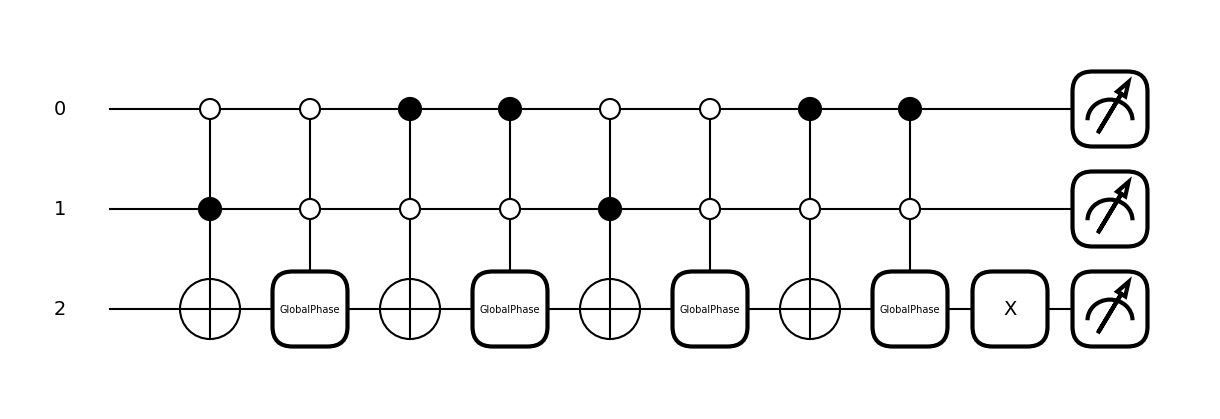

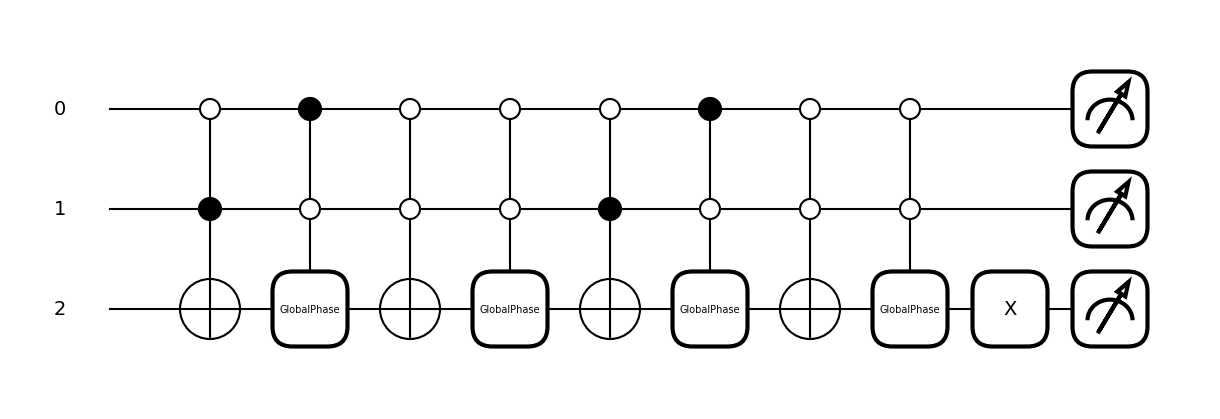

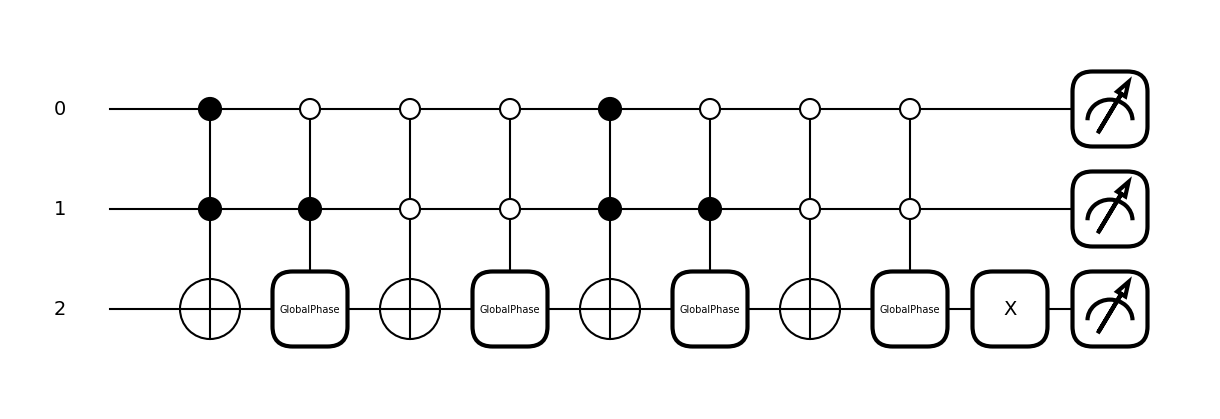

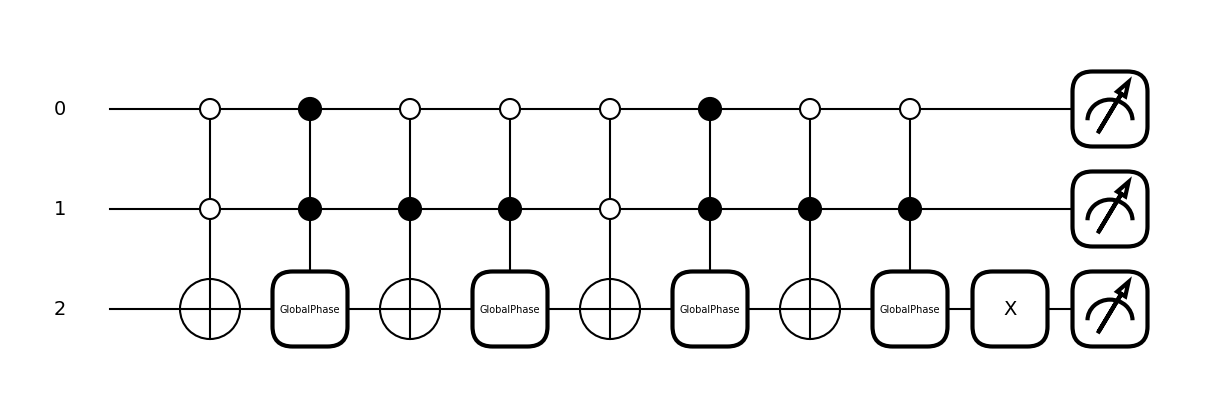

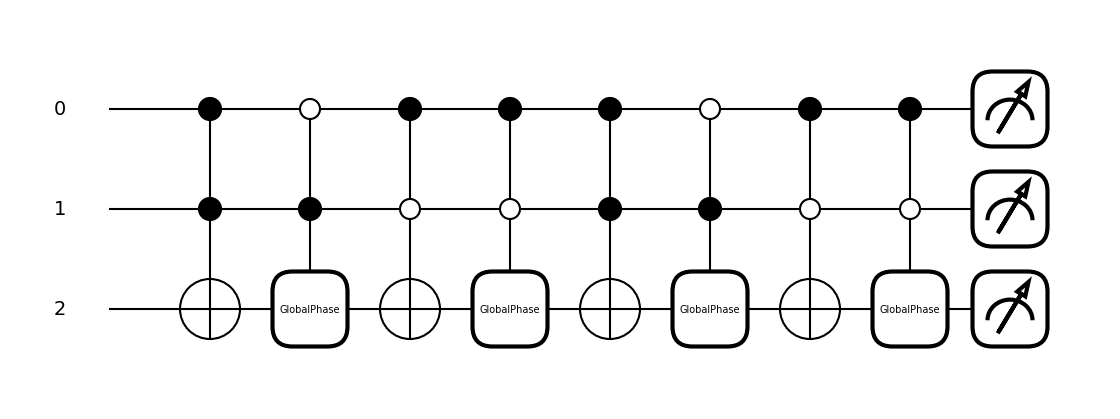

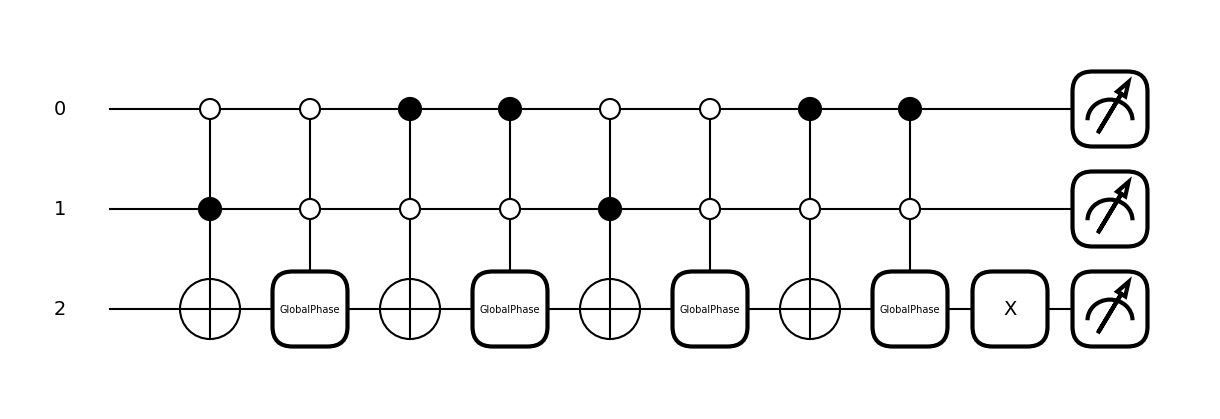

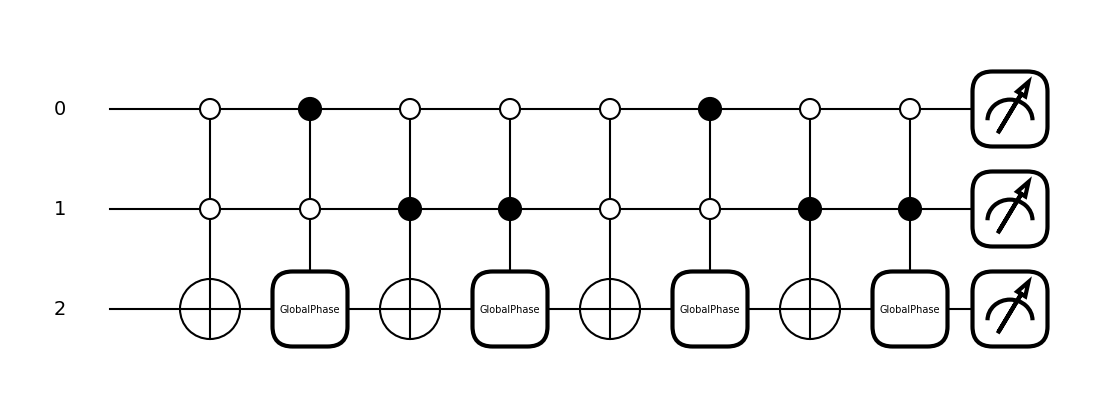

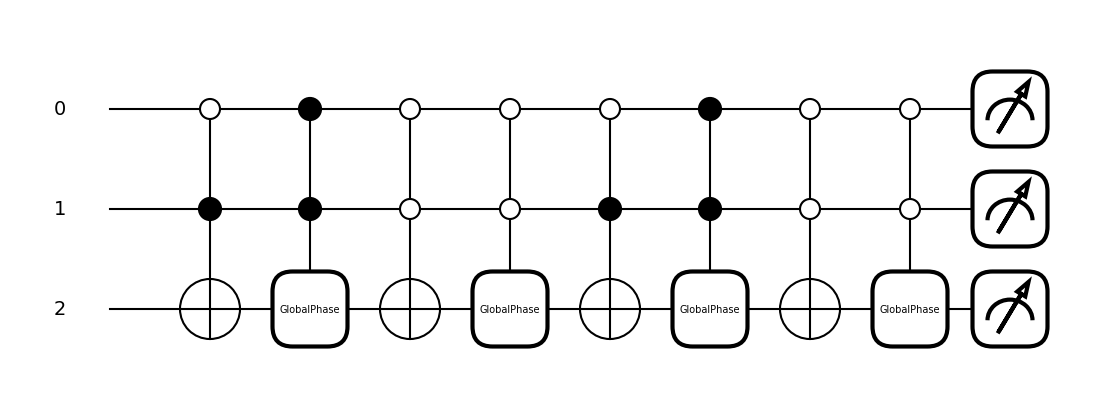

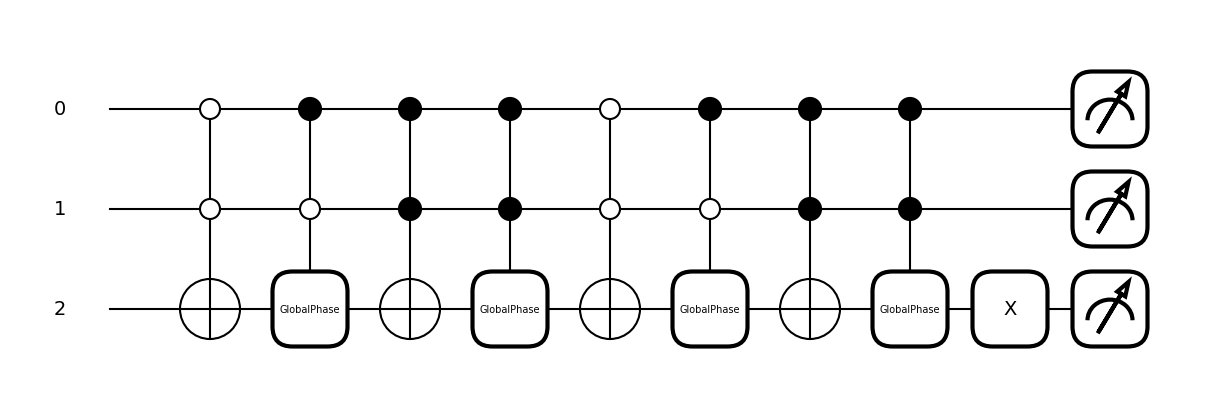

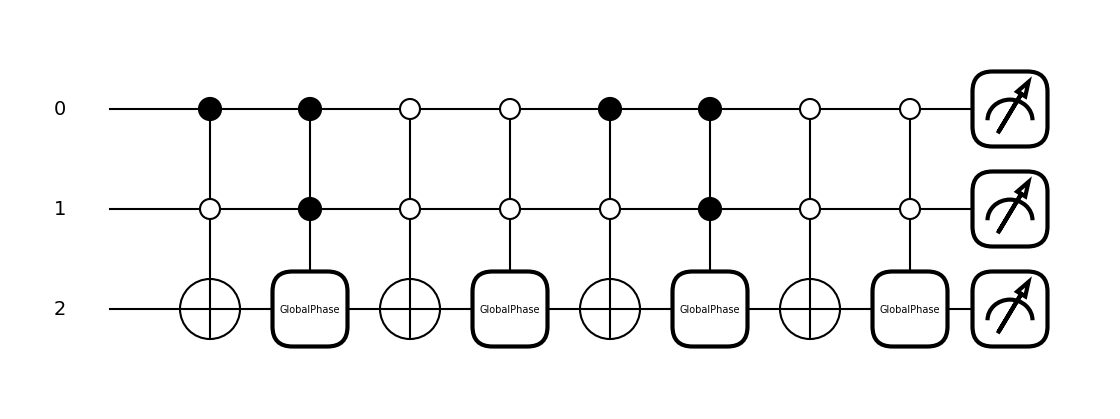

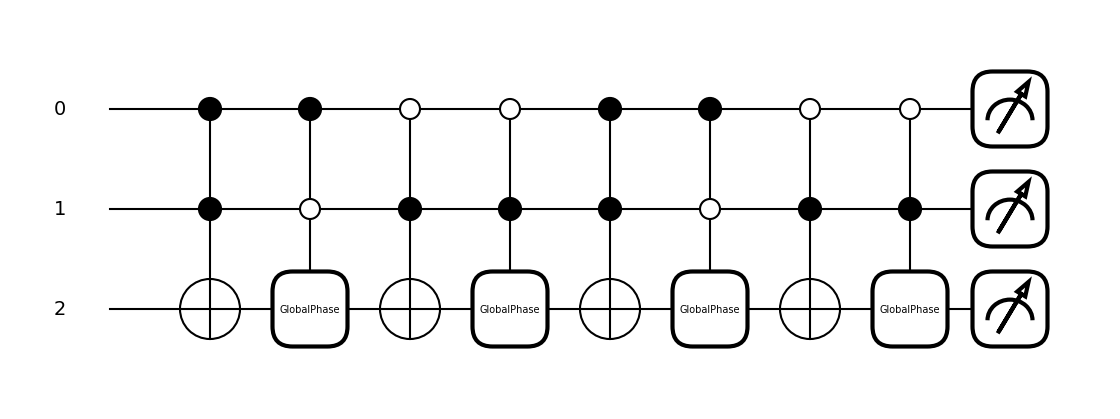

In [257]:
import json
import pennylane as qml
import pennylane.numpy as np

def circuit(oracle):
    dev1 = qml.device('default.qubit', wires=3)
    
    @qml.qnode(dev1)
    def c():
        qml.Hadamard(0)
        qml.CNOT(wires=[0,1])
        qml.apply(oracle)(wires=[0,1,2])  
        return qml.state()

    qml.apply(oracle)(wires=[0,1,2])      
    s = set(np.round(c(),5))
    if len(s) == 3:
        qml.PauliX(2)


def oracle_maker():
    indx = [[0, 0], [1, 0], [1, 1], [0, 1]]

    np.random.shuffle(indx)

    indices_00 = [index for index, value in enumerate(indx) if value == [0, 0]]
    indices_11 = [index for index, value in enumerate(indx) if value == [1, 1]]

    print (indices_00, indices_11, indx)

    if set([indices_00[0], indices_11[0]]) == set([0, 1]) or set([indices_00[0], indices_11[0]]) == set([2, 3]):
        target = 0
    else:
        target = 1

    def oracle(wires):

        class op(qml.operation.Operation):
            num_wires = 3
            grad_method = None

            def __init__(self, wires, id=None):
                super().__init__(wires=wires, id=id)

            @property
            def num_params(self):
                return 0

            @staticmethod
            def compute_decomposition(wires):
                wires_input = wires[:2]
                wire_output = wires[2]

                ops = []
                ops.append(qml.ctrl(qml.PauliX(wires=wire_output), control=wires_input, control_values=indx[1]))

                ops.append(
                    qml.ctrl(qml.GlobalPhase(np.pi, wires=wire_output), control=wires_input, control_values=indx[2]))

                ops.append(qml.ctrl(qml.PauliX(wires=wire_output), control=wires_input, control_values=indx[3]))
                ops.append(
                    qml.ctrl(qml.GlobalPhase(np.pi, wires=wire_output), control=wires_input, control_values=indx[3]))

                return ops

        return op(wires=wires)

    return oracle, target


def run(case: str) -> str:
    return "No output"


def check(have: str, want: str) -> None:
    for _ in range(100):
        oracle, target = oracle_maker()

        dev = qml.device("default.qubit", wires=3)

        @qml.qnode(dev)
        def test_circuit():
            circuit(oracle)
            return qml.state()

        a = test_circuit()
        print ('circuit = ', np.round(a,5), "target = ", target, test_circuit()[1])
        for k,v in enumerate(a):
            if np.round(v,5):
                print (format(k, '05b')[2:], v)
        qml.draw_mpl(test_circuit, expansion_strategy='device')()
        print ([op.name for op in test_circuit.tape.operations].count("op"))
        assert [op.name for op in test_circuit.tape.operations].count("op") == 1, "You can use the oracle once."

        assert np.isclose(test_circuit()[1], target), "Wrong answer!"


# These are the public test cases
test_cases = [
    ('No input', 'No output')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")